In [5]:
from global_land_mask import globe
import pandas as pd
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("F:/Datasets/preprocessed/") if isfile(join("F:/Datasets/preprocessed/", f))]

import pandas as pd
concat = None
for x in range(len(onlyfiles)):
    middleEast = pd.read_csv("../preprocessed/"+str(onlyfiles[x]))
    middleEast = middleEast[(middleEast['Latitude'] < 50) & (middleEast['Latitude'] > 29)] 
    middleEast = middleEast[(middleEast['Longitude'] > -5) & (middleEast['Longitude'] < 36)]
    middleEast = middleEast.drop(middleEast[((middleEast['Latitude'] > 40.625) & (middleEast['Longitude'] > 26.625))].index)
    middleEast = middleEast.drop(middleEast[((middleEast['Latitude'] > 43) & (middleEast['Longitude'] < 2))].index)
    middleEast = middleEast.drop(middleEast[globe.is_land(middleEast.Latitude, middleEast.Longitude)].index)
    concat = pd.concat([concat, middleEast], ignore_index=True)
#concat = concat[(concat["nstn"]>6)&(concat["Power (J)"]*0.3>concat["pUncertainty"])]
#concat.to_csv('../old uncertain CSVs/All mediterranean.csv')
concat

,Unnamed: 0,Date,Time,Latitude,Longitude,Uncertainty,nstn,Power (J),pUncertainty,nstn_power
0,29,2009/12/1,00:00:05.665519,37.6420,4.9377,12.3,11.0,60484.92,9786.55,3.0
1,331,2009/12/1,00:01:11.526725,38.6991,8.3091,16.0,9.0,3046.67,896.31,3.0
2,742,2009/12/1,00:02:38.842432,36.9608,4.2523,29.6,7.0,7787.19,165.23,3.0
3,817,2009/12/1,00:02:54.726844,39.0087,5.9722,14.0,7.0,851.00,150.34,3.0
4,824,2009/12/1,00:02:56.941956,37.3525,7.2369,26.7,7.0,5440.39,965.21,2.0
...,...,...,...,...,...,...,...,...,...,...
1360547,36409415,2022/1/25,23:44:44.505640,32.2615,24.6026,19.5,7.0,12871.69,0.00,1.0
1360548,36409772,2022/1/25,23:45:31.131575,35.7085,32.4864,11.9,9.0,23209.92,5771.85,4.0
1360549,36410871,2022/1/25,23:47:52.814176,34.8443,30.6639,11.7,8.0,1411.87,269.36,8.0
1360550,36414033,2022/1/25,23:54:26.740204,32.4175,30.6500,18.8,7.0,1437.48,367.78,6.0


In [8]:
df = pd.read_csv("../preprocessed/All mediterranean.csv")
df

,Date,Time,Latitude,Longitude,Power (J)
0,2009/12/1,00:00:05.665519,37.6420,4.9377,60484.92
1,2009/12/1,00:01:11.526725,38.6991,8.3091,3046.67
2,2009/12/1,00:02:38.842432,36.9608,4.2523,7787.19
3,2009/12/1,00:02:54.726844,39.0087,5.9722,851.00
4,2009/12/1,00:02:56.941956,37.3525,7.2369,5440.39
...,...,...,...,...,...
1360547,2022/1/25,23:44:44.505640,32.2615,24.6026,12871.69
1360548,2022/1/25,23:45:31.131575,35.7085,32.4864,23209.92
1360549,2022/1/25,23:47:52.814176,34.8443,30.6639,1411.87
1360550,2022/1/25,23:54:26.740204,32.4175,30.6500,1437.48


In [14]:
import pandas as pd

df = pd.read_csv("../preprocessed/All mediterranean.csv")
df = df.drop('Time', axis=1)

# convert the "Date" column into datetime format
df['Date'] = pd.to_datetime(df['Date'])
gdf = df.groupby(['Date']).agg({'Power (J)': ['count','mean', "sum"]})
gdf.columns = gdf.columns.map('_'.join) # Flatten column names
gdf = gdf.reset_index()
gdf = gdf.rename(columns={'Power (J)_count': 'Count','Power (J)_mean': 'Mean Energy (J)','Power (J)_sum': 'Total Energy (J)'})

gdf.to_csv("../new CSVs and Graphs/Daily Metrics.csv",index=False)

In [17]:
# create a boolean mask for rows that start with the specified values
mask = (~df['Date'].str.startswith('2020')) & (~df['Date'].str.startswith('2021')) & (~df['Date'].str.startswith('2009')) & (~df['Date'].str.startswith('2022'))

# select only the rows that do not start with the specified values
filtered_df = df[mask]

filtered_df

,Date,Time,Latitude,Longitude,Power (J)
163643,2010/1/1,00:12:01.189235,38.9154,3.9769,2478.04
163644,2010/1/1,00:12:11.640935,43.4267,10.2262,4921.24
163645,2010/1/1,00:12:41.493925,39.5001,13.6251,1031.57
163646,2010/1/1,00:12:41.848790,38.5172,15.2319,612.76
163647,2010/1/1,00:14:20.533906,38.9682,3.9476,2078.96
...,...,...,...,...,...
6474689,2019/12/31,23:03:52.350675,33.3123,13.5870,192.57
6474690,2019/12/31,23:03:52.350666,33.3398,13.6398,209.03
6474691,2019/12/31,23:21:12.173156,31.3457,19.1422,293.49
6474692,2019/12/31,23:28:07.975416,32.8152,12.6529,13120.52


In [20]:
import pandas as pd

df2 = pd.read_csv("../preprocessed/All mediterranean.csv")

df2

,Date,Time,Latitude,Longitude,Power (J)
0,2009/12/1,00:00:05.665519,37.6420,4.9377,60484.92
1,2009/12/1,00:01:11.526725,38.6991,8.3091,3046.67
2,2009/12/1,00:02:38.842432,36.9608,4.2523,7787.19
3,2009/12/1,00:02:54.726844,39.0087,5.9722,851.00
4,2009/12/1,00:02:56.941956,37.3525,7.2369,5440.39
...,...,...,...,...,...
1360547,2022/1/25,23:44:44.505640,32.2615,24.6026,12871.69
1360548,2022/1/25,23:45:31.131575,35.7085,32.4864,23209.92
1360549,2022/1/25,23:47:52.814176,34.8443,30.6639,1411.87
1360550,2022/1/25,23:54:26.740204,32.4175,30.6500,1437.48


In [21]:
# create a boolean mask for rows that start with the specified values
mask = (~df2['Date'].str.startswith('2020')) & (~df2['Date'].str.startswith('2021')) & (~df2['Date'].str.startswith('2022'))

# select only the rows that do not start with the specified values
filtered_df2 = df2[mask]

filtered_df2

,Date,Time,Latitude,Longitude,Power (J)
0,2009/12/1,00:00:05.665519,37.6420,4.9377,60484.92
1,2009/12/1,00:01:11.526725,38.6991,8.3091,3046.67
2,2009/12/1,00:02:38.842432,36.9608,4.2523,7787.19
3,2009/12/1,00:02:54.726844,39.0087,5.9722,851.00
4,2009/12/1,00:02:56.941956,37.3525,7.2369,5440.39
...,...,...,...,...,...
1251009,2019/12/31,22:53:26.505615,31.7579,19.1197,539.75
1251010,2019/12/31,22:59:08.675602,36.2227,35.4938,49556.90
1251011,2019/12/31,22:59:09.166856,36.1460,35.7524,478.17
1251012,2019/12/31,23:03:12.119960,31.6214,19.1479,81.30


In [21]:
merged_df = filtered_df.merge(filtered_df2, how='outer', indicator=True)

# drop the rows that are present in df2
result_df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)

result_df

,Date,Time,Latitude,Longitude,Power (J)
0,2010/1/1,00:12:01.189235,38.9154,3.9769,2478.04
1,2010/1/1,00:12:11.640935,43.4267,10.2262,4921.24
2,2010/1/1,00:12:41.493925,39.5001,13.6251,1031.57
3,2010/1/1,00:12:41.848790,38.5172,15.2319,612.76
4,2010/1/1,00:14:20.533906,38.9682,3.9476,2078.96
...,...,...,...,...,...
6398649,2019/12/31,23:03:52.280267,33.0374,13.5456,0.00
6398650,2019/12/31,23:03:52.350675,33.3123,13.5870,192.57
6398651,2019/12/31,23:03:52.350666,33.3398,13.6398,209.03
6398652,2019/12/31,23:21:12.173156,31.3457,19.1422,293.49


In [22]:
result_df.to_csv("Mediterranean cleared by HW.csv",index=False)

In [23]:
filtered_df2.to_csv("../RELEVANT CSVS/Mediterranean filtered lightnings.csv",index=False)

In [37]:
import pandas as pd
df = pd.read_csv("../postprocessed/Biogeochemistry frequency vector.csv") 
df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647
...,...,...,...,...,...,...,...,...,...,...,...
9601,2020-02,44.0,14.0,13,38.322081,13.223113,8.179302,2.389557,2.730751,1.621175,0.071258
9602,2020-02,44.0,15.0,3,38.237736,12.796427,8.189383,2.389269,2.732072,1.558660,0.071450
9603,2020-02,45.0,12.0,1,36.524095,10.136201,8.221334,2.490124,2.821803,2.704565,0.077259
9604,2020-02,45.0,13.0,1,37.674167,11.064157,8.203387,2.354789,2.680883,2.170876,0.071160


In [38]:
df2 = pd.read_csv("../postprocessed/Precipitation 2009-2021.csv") 
df2

,Latitude,Longitude,Month,Precipitation
0,30.0,0.0,2009-01,15.230131
1,30.0,1.0,2009-01,12.261946
2,30.0,2.0,2009-01,11.150103
3,30.0,3.0,2009-01,6.969514
4,30.0,4.0,2009-01,12.600430
...,...,...,...,...
754846,46.0,-5.0,2020-12,0.000000
754847,46.0,-4.0,2020-12,0.000000
754848,46.0,-3.0,2020-12,0.000000
754849,46.0,-2.0,2020-12,0.552781


In [35]:
df["Alk/Sal"] = df["Alkalinity"]/df["Salinity"]
df

,time,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal
0,2009-12-01,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504,0.070075
1,2009-12-01,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485,0.070074
2,2009-12-01,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656,0.070015
3,2009-12-01,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145,0.070092
4,2009-12-01,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258,0.070060
...,...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223,0.074266
1245093,2020-02-28,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395,0.074372
1245094,2020-02-28,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841,0.072576
1245095,2020-02-28,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841,0.072576


In [36]:
import pandas as pd
df.to_csv("../postprocessed/Biogeochemistry power vector.csv",index  = False) 

In [25]:
total_count = df['Count'].sum()
print(total_count)

1299003


In [43]:
df3 = pd.read_csv("../new features/TSI2009.csv")
df3

,Unnamed: 0,date_yyyymmdd,tsi_1au,tsi_true_earth,Date_YYYY,Date_MM,Date_DD,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2836,20101201.5,1360.5835,1399.2208,2010,12,1,NaN,NaN,NaN,NaN
1,2837,20101202.5,1360.7292,1399.7915,2010,12,2,NaN,NaN,NaN,NaN
2,2838,20101203.5,1360.8143,1400.2987,2010,12,3,NaN,NaN,NaN,NaN
3,2839,20101204.5,1360.8182,1400.7277,2010,12,4,NaN,NaN,NaN,NaN
4,2840,20101205.5,1360.7201,1401.0583,2010,12,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
85,2921,20110224.5,1360.7935,1389.5169,2011,2,24,NaN,NaN,NaN,NaN
86,2922,20110225.5,1360.7797,1388.8399,2011,2,25,NaN,NaN,NaN,NaN
87,2923,20110226.5,1360.8583,1388.2634,2011,2,26,NaN,NaN,NaN,NaN
88,2924,20110227.5,1360.9201,1387.6475,2011,2,27,NaN,NaN,NaN,NaN


In [54]:
df = pd.read_csv("../relevant csvs/Mediterranean filtered lightnings.csv")
df

,Date,Time,Latitude,Longitude,Power (J)
0,2010/1/1,00:15:35.929710,41.8676,9.4085,20083.19
1,2010/1/1,00:23:50.689911,39.0313,4.1511,7371.30
2,2010/1/1,00:25:29.912185,38.8053,4.0867,843.65
3,2010/1/1,00:27:44.476355,39.0261,4.1472,4205.82
4,2010/1/1,00:29:25.826195,39.1194,4.2846,758.99
...,...,...,...,...,...
1223620,2019/12/31,22:53:26.505615,31.7579,19.1197,539.75
1223621,2019/12/31,22:59:08.675602,36.2227,35.4938,49556.90
1223622,2019/12/31,22:59:09.166856,36.1460,35.7524,478.17
1223623,2019/12/31,23:03:12.119960,31.6214,19.1479,81.30


In [51]:
df = df.drop('Time', axis=1)
df

,Date,Latitude,Longitude,Power (J)
0,2010/1/1,41.8676,9.4085,20083.19
1,2010/1/1,39.0313,4.1511,7371.30
2,2010/1/1,38.8053,4.0867,843.65
3,2010/1/1,39.0261,4.1472,4205.82
4,2010/1/1,39.1194,4.2846,758.99
...,...,...,...,...
1223620,2019/12/31,31.7579,19.1197,539.75
1223621,2019/12/31,36.2227,35.4938,49556.90
1223622,2019/12/31,36.1460,35.7524,478.17
1223623,2019/12/31,31.6214,19.1479,81.30


In [57]:
result_df = df.groupby('Date').agg({'Power (J)': ['count', 'mean', 'sum']})
result_df.columns = result_df.columns.map('_'.join) # Flatten column names
df = result_df.reset_index(col_level=1)
df.columns = ['Date', 'Count', 'Mean Power (J)', 'Sum Power (J)']

df

,Date,Count,Mean Power (J),Sum Power (J)
0,2010/1/1,360,21751.131278,7830407.26
1,2010/1/10,519,28901.429364,14999841.84
2,2010/1/11,113,11955.240531,1350942.18
3,2010/1/12,356,16647.440562,5926488.84
4,2010/1/13,733,13134.048813,9627257.78
...,...,...,...,...
864,2019/2/5,13301,1688.517655,22458973.33
865,2019/2/6,1490,6178.502477,9205968.69
866,2019/2/7,662,6305.658671,4174346.04
867,2019/2/8,961,6216.240302,5973806.93


In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df = df.sort_values('Date', ascending=True)

df

,Date,Count,Mean Power (J),Sum Power (J)
0,2010-01-01,360,21751.131278,7830407.26
11,2010-01-02,152,27141.081842,4125444.44
22,2010-01-03,70,13852.850143,969699.51
24,2010-01-04,41,4286.462439,175744.96
25,2010-01-05,300,11993.217600,3597965.28
...,...,...,...,...
830,2019-12-27,1967,6113.701185,12025650.23
831,2019-12-28,1529,5718.018869,8742850.85
832,2019-12-29,5203,4623.279450,24054922.98
834,2019-12-30,2951,7314.414934,21584838.47


In [ ]:
df.to_csv("Daily Lightning Metrics.csv",index=False)

In [1]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("F:/Datasets/new features/") if isfile(join("F:/Datasets/new features/", f))]

import pandas as pd
concat = None
for x in range(len(onlyfiles)):
    file = pd.read_table('../new features/'+str(onlyfiles[x]), sep=',')
    concat = pd.concat([concat, file], ignore_index=True)
concat.to_csv('../new features/All.csv')

In [33]:
df = pd.read_csv("../new features/All.csv")
df = df.rename(columns={df.columns[0]: 'Date'})
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].str[:-2]
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df['Month'] = df['Date'].dt.strftime('%Y-%m')
df
df.to_csv('../relevant csvs/TSI.csv',index=False)

In [70]:
df = pd.read_csv("../relevant csvs/new vector.csv")
df = df.rename(columns={df.columns[0]: 'Date'})
df

,Date,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon
0,2009-12-01,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504
1,2009-12-01,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485
2,2009-12-01,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656
3,2009-12-01,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145
4,2009-12-01,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258
...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223
1245093,2020-02-28,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395
1245094,2020-02-28,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841
1245095,2020-02-28,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841


In [68]:
import numpy as np
df2 = pd.read_csv("../relevant csvs/TSI.csv")
cols_to_drop = [3]
df2 = df2.drop(df2.columns[cols_to_drop], axis=1)
df2.replace(0, np.nan, inplace=True)
grouped_df = df2.groupby(['Date'], as_index=False).agg({'tsi_1au': 'mean','tsi_true_earth': 'mean'})
grouped_df

,Date,tsi_1au,tsi_true_earth
0,2010-12-01,1360.5835,1399.2208
1,2010-12-02,1360.7292,1399.7915
2,2010-12-03,1360.8143,1400.2987
3,2010-12-04,1360.8182,1400.7277
4,2010-12-05,1360.7201,1401.0583
...,...,...,...
894,2020-02-21,1360.6554,1391.4982
895,2020-02-22,1360.6310,1390.8350
896,2020-02-23,1360.6291,1390.2294
897,2020-02-24,1360.6348,1389.5007


In [72]:
merged_df = pd.merge(df, grouped_df, on='Date', how='outer')
merged_df = merged_df.dropna(subset=['Latitude'])
merged_df

,Date,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon,tsi_1au,tsi_true_earth
0,2009-12-01,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504,NaN,NaN
1,2009-12-01,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485,NaN,NaN
2,2009-12-01,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656,NaN,NaN
3,2009-12-01,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145,NaN,NaN
4,2009-12-01,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223,NaN,NaN
1245093,2020-02-28,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395,NaN,NaN
1245094,2020-02-28,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN
1245095,2020-02-28,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN


In [73]:
merged_df["Alk/Sal"] = merged_df["Alkalinity"]/merged_df["Salinity"]
merged_df

,Date,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon,tsi_1au,tsi_true_earth,Alk/Sal
0,2009-12-01,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504,NaN,NaN,0.070075
1,2009-12-01,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485,NaN,NaN,0.070074
2,2009-12-01,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656,NaN,NaN,0.070015
3,2009-12-01,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145,NaN,NaN,0.070092
4,2009-12-01,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258,NaN,NaN,0.070060
...,...,...,...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223,NaN,NaN,0.074266
1245093,2020-02-28,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395,NaN,NaN,0.074372
1245094,2020-02-28,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN,0.072576
1245095,2020-02-28,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN,0.072576


In [75]:
merged_df.to_csv("../relevant csvs/Biogeochemistry power vector.csv",index=False)

In [74]:
df3 = pd.read_csv("../RELEVANT CSVS/Precipitation 2009-2021.csv")
df3

,Latitude,Longitude,Month,Precipitation
0,30.0,0.0,2009-01,15.230131
1,30.0,1.0,2009-01,12.261946
2,30.0,2.0,2009-01,11.150103
3,30.0,3.0,2009-01,6.969514
4,30.0,4.0,2009-01,12.600430
...,...,...,...,...
754846,46.0,-5.0,2020-12,0.000000
754847,46.0,-4.0,2020-12,0.000000
754848,46.0,-3.0,2020-12,0.000000
754849,46.0,-2.0,2020-12,0.552781


In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df['Date'] = df['Date'].str[:-3]
df["Latitude"]=np.floor(df["Latitude"])
df["Longitude"]=np.floor(df["Longitude"])
df

,Date,Latitude,Longitude,Power (J)
0,2009-12,37.0,4.0,60484.92
1,2009-12,38.0,8.0,3046.67
2,2009-12,36.0,4.0,7787.19
3,2009-12,39.0,5.0,851.00
4,2009-12,37.0,7.0,5440.39
...,...,...,...,...
1360547,2022-01,32.0,24.0,12871.69
1360548,2022-01,35.0,32.0,23209.92
1360549,2022-01,34.0,30.0,1411.87
1360550,2022-01,32.0,30.0,1437.48


In [29]:
import pandas as pd
import matplotlib as plt

# aggregate the dataframe by "Date" column, calculating mean and count of "Power (J)"
df = df.groupby(['Date','Latitude','Longitude']).agg({'Power (J)': ['mean', "sum"]})

df.columns = ['_'.join(col).strip() for col in df.columns.values]
# reset the index to get the "Date" column back
df = df.reset_index()

df

,Date,Latitude,Longitude,Power (J)_mean,Power (J)_sum
0,2009-12,31.0,17.0,1747.330000,1747.33
1,2009-12,31.0,26.0,21586.630000,21586.63
2,2009-12,31.0,27.0,10764.926154,139944.04
3,2009-12,31.0,28.0,10836.028684,411769.09
4,2009-12,31.0,29.0,12794.811667,614150.96
...,...,...,...,...,...
10275,2022-01,44.0,14.0,3266.046400,244953.48
10276,2022-01,44.0,15.0,349.750000,1049.25
10277,2022-01,45.0,12.0,5055.013125,80880.21
10278,2022-01,45.0,13.0,18766.386667,281495.80


In [31]:
df = df.rename(columns={"Date": "Month"})

In [60]:
df = pd.read_csv("../relevant csvs/Biogeochemistry frequency vector with tsi.csv")
df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,tsi_1au,tsi_true_earth,Alk/Sal
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,NaN,NaN,0.070253
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,NaN,NaN,0.070020
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,NaN,NaN,0.069898
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,NaN,NaN,0.069749
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,NaN,NaN,0.069647
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601,2020-02,44.0,14.0,13,38.322081,13.223113,8.179302,2.389557,2.730751,1.621175,1360.66178,1395.803724,0.071258
9602,2020-02,44.0,15.0,3,38.237736,12.796427,8.189383,2.389269,2.732072,1.558660,1360.66178,1395.803724,0.071450
9603,2020-02,45.0,12.0,1,36.524095,10.136201,8.221334,2.490124,2.821803,2.704565,1360.66178,1395.803724,0.077259
9604,2020-02,45.0,13.0,1,37.674167,11.064157,8.203387,2.354789,2.680883,2.170876,1360.66178,1395.803724,0.071160


In [33]:
df2 = pd.merge(df2, df, on=["Month", "Latitude", "Longitude"], how="left")
df2

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,tsi_1au,tsi_true_earth,Alk/Sal,Power (J)_mean,Power (J)_sum
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,NaN,NaN,0.070253,1747.330000,1747.33
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,NaN,NaN,0.070020,21586.630000,21586.63
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,NaN,NaN,0.069898,10764.926154,139944.04
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,NaN,NaN,0.069749,10836.028684,411769.09
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,NaN,NaN,0.069647,12794.811667,614150.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601,2020-02,44.0,14.0,13,38.322081,13.223113,8.179302,2.389557,2.730751,1.621175,1360.66178,1395.803724,0.071258,122.364615,1590.74
9602,2020-02,44.0,15.0,3,38.237736,12.796427,8.189383,2.389269,2.732072,1.558660,1360.66178,1395.803724,0.071450,114.880000,344.64
9603,2020-02,45.0,12.0,1,36.524095,10.136201,8.221334,2.490124,2.821803,2.704565,1360.66178,1395.803724,0.077259,8628.890000,8628.89
9604,2020-02,45.0,13.0,1,37.674167,11.064157,8.203387,2.354789,2.680883,2.170876,1360.66178,1395.803724,0.071160,31759.040000,31759.04


In [ ]:
df2.to_csv("../RELEVANT CSVS/Frequency for correlation.csv",index=False)

In [61]:
import pandas as pd
df = pd.read_csv("../relevant csvs/Frequency for correlation.csv")
df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,tsi_1au,tsi_true_earth,Alk/Sal,Power (J)_mean,Power (J)_sum
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,NaN,NaN,0.070253,1747.330000,1747.33
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,NaN,NaN,0.070020,21586.630000,21586.63
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,NaN,NaN,0.069898,10764.926154,139944.04
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,NaN,NaN,0.069749,10836.028684,411769.09
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,NaN,NaN,0.069647,12794.811667,614150.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601,2020-02,44.0,14.0,13,38.322081,13.223113,8.179302,2.389557,2.730751,1.621175,1360.66178,1395.803724,0.071258,122.364615,1590.74
9602,2020-02,44.0,15.0,3,38.237736,12.796427,8.189383,2.389269,2.732072,1.558660,1360.66178,1395.803724,0.071450,114.880000,344.64
9603,2020-02,45.0,12.0,1,36.524095,10.136201,8.221334,2.490124,2.821803,2.704565,1360.66178,1395.803724,0.077259,8628.890000,8628.89
9604,2020-02,45.0,13.0,1,37.674167,11.064157,8.203387,2.354789,2.680883,2.170876,1360.66178,1395.803724,0.071160,31759.040000,31759.04


In [ ]:
import numpy as np

df["Longituder"] = np.floor(df["Longitude"])
df["Latituder"] = np.floor(df["Latitude"])
df

In [70]:
import pandas as pd
df2 = pd.read_csv("../relevant csvs/precipitation 2009-2020.csv")
df2

,Latituder,Longituder,Date,Precipitation
0,30.0,0.0,2009-01-01,15.230131
1,30.0,1.0,2009-01-01,12.261946
2,30.0,2.0,2009-01-01,11.150103
3,30.0,3.0,2009-01-01,6.969514
4,30.0,4.0,2009-01-01,12.600430
...,...,...,...,...
773257,46.0,-5.0,2020-12-31,0.000000
773258,46.0,-4.0,2020-12-31,0.000000
773259,46.0,-3.0,2020-12-31,0.000000
773260,46.0,-2.0,2020-12-31,0.552781


In [71]:
df2 = df2.rename(columns={'Date': 'Month','Latituder':'Latitude','Longituder':'Longitude'})
df2['Month'] = df2['Month'].str[:-3]
df2 = df2.groupby(['Month','Latitude','Longitude'], as_index=False).agg({'Precipitation': 'mean'})
df2

,Month,Latitude,Longitude,Precipitation
0,2009-01,30.0,-5.0,0.384869
1,2009-01,30.0,-4.0,0.577761
2,2009-01,30.0,-3.0,0.658435
3,2009-01,30.0,-2.0,0.804741
4,2009-01,30.0,-1.0,0.593007
...,...,...,...,...
25699,2020-12,46.0,32.0,1.216075
25700,2020-12,46.0,33.0,0.891559
25701,2020-12,46.0,34.0,0.915660
25702,2020-12,46.0,35.0,1.230312


In [72]:
merged_df = pd.merge(df, df2, on=['Longitude', 'Latitude', 'Month'], how='left')
merged_df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation_x,tsi_1au,tsi_true_earth,Alk/Sal,Power (J)_mean,Power (J)_sum,Precipitation_y
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,NaN,NaN,0.070253,1747.330000,1747.33,0.647728
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,NaN,NaN,0.070020,21586.630000,21586.63,0.663860
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,NaN,NaN,0.069898,10764.926154,139944.04,0.645974
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,NaN,NaN,0.069749,10836.028684,411769.09,0.582848
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,NaN,NaN,0.069647,12794.811667,614150.96,0.903497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601,2020-02,44.0,14.0,13,38.322081,13.223113,8.179302,2.389557,2.730751,1.621175,1360.66178,1395.803724,0.071258,122.364615,1590.74,1.621175
9602,2020-02,44.0,15.0,3,38.237736,12.796427,8.189383,2.389269,2.732072,1.558660,1360.66178,1395.803724,0.071450,114.880000,344.64,1.558660
9603,2020-02,45.0,12.0,1,36.524095,10.136201,8.221334,2.490124,2.821803,2.704565,1360.66178,1395.803724,0.077259,8628.890000,8628.89,2.704565
9604,2020-02,45.0,13.0,1,37.674167,11.064157,8.203387,2.354789,2.680883,2.170876,1360.66178,1395.803724,0.071160,31759.040000,31759.04,2.170876


In [49]:
cols_to_drop = ["Longituder", "Latituder"]
merged_df = merged_df.drop(cols_to_drop, axis=1)
merged_df

,Date,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon,tsi_1au,tsi_true_earth,Alk/Sal,Precipitation
0,2009-12-01,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504,NaN,NaN,0.070075,0.00000
1,2009-12-01,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485,NaN,NaN,0.070074,0.00000
2,2009-12-01,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656,NaN,NaN,0.070015,0.00000
3,2009-12-01,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145,NaN,NaN,0.070092,0.00000
4,2009-12-01,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258,NaN,NaN,0.070060,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223,NaN,NaN,0.074266,5.80008
1245093,2020-02-28,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395,NaN,NaN,0.074372,5.80008
1245094,2020-02-28,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN,0.072576,5.80008
1245095,2020-02-28,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN,0.072576,5.80008


In [50]:
merged_df.to_csv("../RELEVANT CSVS/Biogeochemistry power vector with prec.csv",index=False)

In [1]:
import pandas as pd
df = pd.read_csv("../RELEVANT CSVS/Biogeochemistry power vector with prec.csv")
df

,Date,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon,tsi_1au,tsi_true_earth,Alk/Sal,Precipitation
0,2009-12-01,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504,NaN,NaN,0.070075,0.00000
1,2009-12-01,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485,NaN,NaN,0.070074,0.00000
2,2009-12-01,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656,NaN,NaN,0.070015,0.00000
3,2009-12-01,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145,NaN,NaN,0.070092,0.00000
4,2009-12-01,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258,NaN,NaN,0.070060,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223,NaN,NaN,0.074266,5.80008
1245093,2020-02-28,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395,NaN,NaN,0.074372,5.80008
1245094,2020-02-28,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN,0.072576,5.80008
1245095,2020-02-28,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841,NaN,NaN,0.072576,5.80008


normality

In [21]:
import pandas as pd
from scipy.stats import shapiro

# Read in your dataset as a pandas DataFrame
df = pd.read_csv("../RELEVANT CSVS/Biogeochemistry power vector with prec.csv")

# Extract the lightning energy data as a pandas Series
energy_data = df['Power (J)']

# Use the shapiro() function to perform the Shapiro-Wilk test
statistic, p_value = shapiro(energy_data)

# Print the results
print(f'Statistic: {statistic:.4f}, P-value: {p_value:.100f}')

if p_value > 0.05:
    print('The lightning energy data is normally distributed.')
else:
    print('The lightning energy data is not normally distributed.')


Statistic: 0.1632, P-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
The lightning energy data is not normally distributed.


c:\Users\chefi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [17]:
import pandas as pd
import scipy.stats as stats

# Extract the lightning energy data as a pandas Series
energy_data = df['Power (J)']

# Perform the Anderson-Darling test for normality
result = stats.anderson(energy_data, dist='norm')

# Print the results of the test
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 329977.797
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


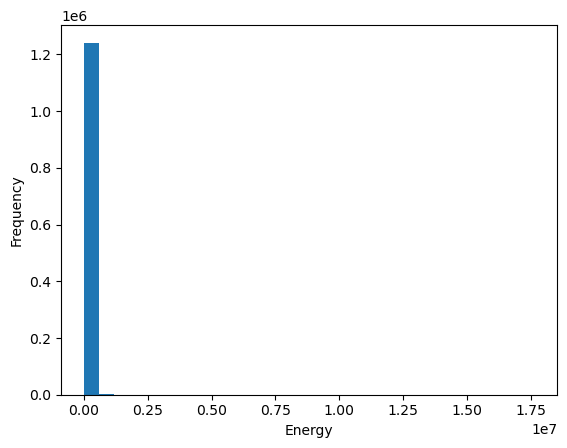

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in your dataset as a pandas DataFrame
df

# Extract the lightning energy data as a pandas Series
energy_data = df['Power (J)']

# Plot a histogram of the energy data
plt.hist(energy_data, bins=30)
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()


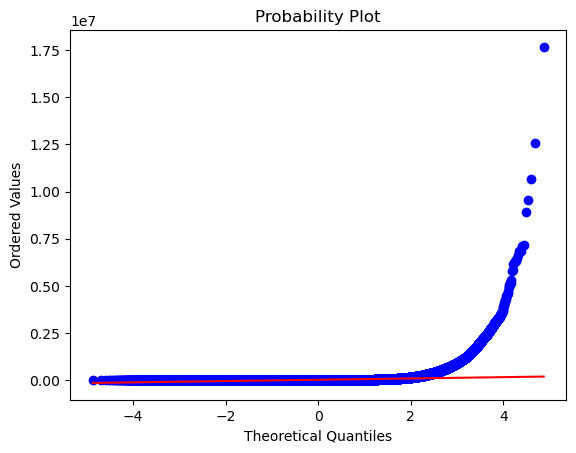

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


# Extract the lightning energy data as a pandas Series
energy_data = df['Power (J)']

# Create a Q-Q plot of the energy data
stats.probplot(energy_data, dist='norm', plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()


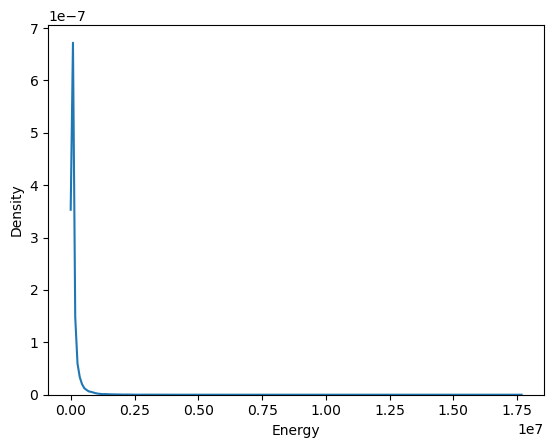

In [14]:
import pandas as pd
import seaborn as sns

# Extract the lightning energy data as a pandas Series
energy_data = df['Power (J)']

# Create a kernel density plot of the energy data
sns.kdeplot(energy_data)
plt.xlabel('Energy')
plt.ylabel('Density')
plt.show()


In [5]:
import pandas as pd
from scipy.stats import shapiro

# Read in your dataset as a pandas DataFrame
df = pd.read_csv("../RELEVANT CSVS/Frequency for correlation.csv")

# Extract the lightning energy data as a pandas Series
energy_data = df['Count']

# Use the shapiro() function to perform the Shapiro-Wilk test
statistic, p_value = shapiro(energy_data)

# Print the results
print(f'Statistic: {statistic:.4f}, P-value: {p_value:.100f}')

if p_value > 0.05:
    print('The lightning energy data is normally distributed.')
else:
    print('The lightning energy data is not normally distributed.')


Statistic: 0.5341, P-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
The lightning energy data is not normally distributed.


c:\Users\chefi\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [2]:
import pandas as pd
import scipy.stats as stats

# Extract the lightning energy data as a pandas Series
energy_data = df['Count']

# Perform the Anderson-Darling test for normality
result = stats.anderson(energy_data, dist='norm')

# Print the results of the test
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 1308.485
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [1]:

import pygrib
import pandas as pd

# Open the GRIB file
grbs = pygrib.open('../CAPE.grib')

# Extract data from GRIB messages
data_list = []
column_names = []

for grb in grbs:
    data = grb.data()
    data_list.append(data)
    column_names.append(grb.parameterName)

# Create a pandas DataFrame
df = pd.DataFrame(data_list, columns=column_names)

# Close the GRIB file
grbs.close()

# Print the DataFrame
print(df)


ModuleNotFoundError: No module named 'pygrib'

In [1]:
import pandas as pd 

df = pd.read_csv("../daily biogeochemistry.csv")

df

,Unnamed: 0,time,latitude,longitude,so,temp,ph,talk,dissic
0,0,2009-12-01 12:00:00,30.312500,18.916666,38.954740,19.959260,8.113097,2.727925,2.356033
1,1,2009-12-01 12:00:00,30.312500,18.958334,38.926605,20.264929,8.109640,2.727126,2.355098
2,2,2009-12-01 12:00:00,30.312500,19.000000,38.916557,20.474968,8.107011,2.726541,2.354309
3,3,2009-12-01 12:00:00,30.312500,19.041666,38.914143,20.547367,8.106014,2.726602,2.354140
4,4,2009-12-01 12:00:00,30.312500,19.083334,38.917503,20.549835,8.106150,2.727115,2.354367
...,...,...,...,...,...,...,...,...,...
143373775,143373775,2020-02-28 12:00:00,45.687500,13.708333,37.262768,10.540786,8.178234,2.749946,2.441770
143373776,143373776,2020-02-28 12:00:00,45.729168,13.541667,33.371845,10.959924,8.157243,2.804251,2.528241
143373777,143373777,2020-02-28 12:00:00,45.729168,13.583333,34.007910,10.739080,8.160475,2.800785,2.520210
143373778,143373778,2020-02-28 12:00:00,45.729168,13.625000,34.865173,10.532424,8.162574,2.794025,2.507789


In [2]:

df2 = df.drop(df.columns[0], axis=1)

# remove last 8 characters from time column
df2['time'] = df2['time'].str[:-8]

df2


,time,latitude,longitude,so,temp,ph,talk,dissic
0,2009-12-01,30.312500,18.916666,38.954740,19.959260,8.113097,2.727925,2.356033
1,2009-12-01,30.312500,18.958334,38.926605,20.264929,8.109640,2.727126,2.355098
2,2009-12-01,30.312500,19.000000,38.916557,20.474968,8.107011,2.726541,2.354309
3,2009-12-01,30.312500,19.041666,38.914143,20.547367,8.106014,2.726602,2.354140
4,2009-12-01,30.312500,19.083334,38.917503,20.549835,8.106150,2.727115,2.354367
...,...,...,...,...,...,...,...,...
143373775,2020-02-28,45.687500,13.708333,37.262768,10.540786,8.178234,2.749946,2.441770
143373776,2020-02-28,45.729168,13.541667,33.371845,10.959924,8.157243,2.804251,2.528241
143373777,2020-02-28,45.729168,13.583333,34.007910,10.739080,8.160475,2.800785,2.520210
143373778,2020-02-28,45.729168,13.625000,34.865173,10.532424,8.162574,2.794025,2.507789


In [4]:
df2 = df2.drop(df2.columns[1], axis=1)
df2 = df2.drop(df2.columns[1], axis=1)

grouped_df = df2.groupby(['time'], as_index=False).agg({'so': 'mean','temp': 'mean','ph': 'mean','talk': 'mean','dissic': 'mean'})


grouped_df


,time,so,temp,ph,talk,dissic
0,2009-12-01,38.295647,18.817296,8.103950,2.680926,2.336660
1,2009-12-02,38.291693,18.687041,8.105366,2.680714,2.336828
2,2009-12-03,38.292724,18.574574,8.106656,2.680598,2.337014
3,2009-12-04,38.294911,18.474488,8.107738,2.680337,2.337088
4,2009-12-05,38.295621,18.366299,8.108809,2.680200,2.337301
...,...,...,...,...,...,...
985,2020-02-24,38.300580,15.687336,8.124895,2.683349,2.357013
986,2020-02-25,38.297983,15.704099,8.124673,2.683403,2.357075
987,2020-02-26,38.300564,15.693211,8.124637,2.683438,2.357194
988,2020-02-27,38.308805,15.674217,8.124623,2.683661,2.357486


In [5]:
df = grouped_df.rename(columns={'time': 'date'})

df

,date,so,temp,ph,talk,dissic
0,2009-12-01,38.295647,18.817296,8.103950,2.680926,2.336660
1,2009-12-02,38.291693,18.687041,8.105366,2.680714,2.336828
2,2009-12-03,38.292724,18.574574,8.106656,2.680598,2.337014
3,2009-12-04,38.294911,18.474488,8.107738,2.680337,2.337088
4,2009-12-05,38.295621,18.366299,8.108809,2.680200,2.337301
...,...,...,...,...,...,...
985,2020-02-24,38.300580,15.687336,8.124895,2.683349,2.357013
986,2020-02-25,38.297983,15.704099,8.124673,2.683403,2.357075
987,2020-02-26,38.300564,15.693211,8.124637,2.683438,2.357194
988,2020-02-27,38.308805,15.674217,8.124623,2.683661,2.357486


In [ ]:
df.to_csv("../Daily Mean Biogeochemistry.csv",index = False)

In [62]:
import pandas as pd

df = pd.read_csv("../RELEVANT CSVS/Mediterranean filtered lightnings.csv")

df["Latitude"].min()

29.0022

In [14]:
import pandas as pd

df = pd.read_csv("../RELEVANT CSVS/Mediterranean filtered lightnings.csv")

df['Time'] = df['Time'].str.slice(stop=-13)
df['Date'] = df['Date'].str[:4]

df_g =df.groupby(['Date','Time']).agg({'Power (J)': ['count', "mean",'sum']})

df_g.columns = df_g.columns.map('_'.join) # Flatten column names
df_g = df_g.reset_index(col_level=1)
df_g = df_g.rename(columns={'Time': 'Hour','Date': 'Year','Power (J)_mean': 'Mean Power (J)','Power (J)_sum': 'Total Power (J)','Power (J)_count': 'Count',})

df_g

,Year,Hour,Count,Mean Power (J),Total Power (J)
0,2010,00,2761,8580.582159,23690987.34
1,2010,01,3160,7871.394247,24873605.82
2,2010,02,3068,7329.407484,22486622.16
3,2010,03,2509,9069.649900,22755751.60
4,2010,04,1660,13061.980428,21682887.51
...,...,...,...,...,...
235,2019,19,10320,7438.766794,76768073.31
236,2019,20,9748,7504.683674,73155656.45
237,2019,21,10362,7663.028777,79404304.19
238,2019,22,10460,7813.233799,81726425.54


In [15]:
df_g.to_csv("../RELEVANT CSVS/Hourly Lightning Metrics with Year.csv",index=False)

In [ ]:
import pandas as pd
from global_land_mask import globe

df = pd.read_csv("../RELEVANT CSVS/precipitation 2009-2020.csv")

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("../RELEVANT CSVS/precipitation 2009-2020.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.loc[df['Precipitation'] < 0, 'Precipitation'] = np.nan
df_g =df.groupby(['Date']).agg({'Precipitation': ["mean",'sum']})
df_g.columns = df_g.columns.map('_'.join) # Flatten column names
df_g = df_g.reset_index(col_level=1)
df_g = df_g.rename(columns={'Precipitation_mean':'Mean','Precipitation_sum':'Total'})
df_g

,Date,Mean,Total
0,2009-01-01,2.812624,2008.213723
1,2009-01-02,1.419918,1013.821324
2,2009-01-03,2.474213,1766.588006
3,2009-01-04,2.393988,1709.307680
4,2009-01-05,1.939377,1384.715345
...,...,...,...
1078,2020-12-27,4.844563,3459.017780
1079,2020-12-28,3.096496,2210.898254
1080,2020-12-29,0.728332,520.028969
1081,2020-12-30,0.788524,563.005955


In [3]:
df_g.to_csv("../hourly lightnings/Daily Precipitation.csv",index=False)

In [51]:
import pandas as pd
import spacepy.pycdf as pycdf
import numpy as np

# Open the CDF file
cdf_file = pycdf.CDF('gps_tec1hr_igs_20091201_v01.cdf')


# Get the data for the tecUHR key
tecUHR = cdf_file['tecUHR'][:]

# Reshape the tecUHR array into a 1D array
tecUHR_flat = np.reshape(tecUHR, -1)

# Create a DataFrame from the flattened array
df = pd.DataFrame({
    'time': np.repeat(cdf_file['Epoch'], 71*73),
    'lat': np.tile(cdf_file['lat'], 24*73),
    'lon': np.tile(cdf_file['lon'], 24*71),
    'tecUHR': tecUHR_flat
})

# Close the CDF file
cdf_file.close()

df

,time,lat,lon,tecUHR
0,2009-12-01 00:00:00,87.5,-180.0,2.4
1,2009-12-01 00:00:00,85.0,-175.0,2.4
2,2009-12-01 00:00:00,82.5,-170.0,2.4
3,2009-12-01 00:00:00,80.0,-165.0,2.3
4,2009-12-01 00:00:00,77.5,-160.0,2.3
...,...,...,...,...
124387,2009-12-01 23:00:00,-77.5,160.0,11.9
124388,2009-12-01 23:00:00,-80.0,165.0,11.6
124389,2009-12-01 23:00:00,-82.5,170.0,11.9
124390,2009-12-01 23:00:00,-85.0,175.0,12.2


In [1]:
import os
import pandas as pd
import spacepy.pycdf as pycdf
import numpy as np

# Set the path to the directory containing the CDF files
cdf_dir = "F:\\Datasets\\tec cdf"

# Initialize an empty list to store the DataFrames for each file
dfs = []

# Loop over all the files in the directory
for filename in os.listdir(cdf_dir):
    if filename.endswith('.cdf'):
        # Open the CDF file
        cdf_file = pycdf.CDF(os.path.join(cdf_dir, filename))

        # Get the data for the tecUHR key
        tecUHR = cdf_file['tecUHR'][:]

        # Reshape the tecUHR array into a 1D array
        tecUHR_flat = np.reshape(tecUHR, -1)

        # Create a DataFrame from the flattened array
        df = pd.DataFrame({
            'time': np.repeat(cdf_file['Epoch'], 71*73),
            'lat': np.tile(cdf_file['lat'], 24*73),
            'lon': np.tile(cdf_file['lon'], 24*71),
            'tecUHR': tecUHR_flat
        })

        # Append the DataFrame to the list
        dfs.append(df)

        # Close the CDF file
        cdf_file.close()

# Concatenate all the DataFrames into one DataFrame
all_data = pd.concat(dfs, ignore_index=True)
all_data


,time,lat,lon,tecUHR
0,2009-12-01 00:00:00,87.5,-180.0,2.4
1,2009-12-01 00:00:00,85.0,-175.0,2.4
2,2009-12-01 00:00:00,82.5,-170.0,2.4
3,2009-12-01 00:00:00,80.0,-165.0,2.3
4,2009-12-01 00:00:00,77.5,-160.0,2.3
...,...,...,...,...
108221035,2019-12-31 23:00:00,-77.5,160.0,8.5
108221036,2019-12-31 23:00:00,-80.0,165.0,8.6
108221037,2019-12-31 23:00:00,-82.5,170.0,8.7
108221038,2019-12-31 23:00:00,-85.0,175.0,8.8


In [2]:

filtered_df = all_data[(all_data['lat'] < 45.5)]
filtered_df = filtered_df[(filtered_df['lat'] > 29)]
filtered_df = filtered_df[(filtered_df['lon'] <= 30)]
filtered_df = filtered_df[(filtered_df['lon'] >= -5)]

filtered_df


,time,lat,lon,tecUHR
1721,2009-12-01 00:00:00,45.0,30.0,6.0
1792,2009-12-01 00:00:00,45.0,20.0,5.7
1793,2009-12-01 00:00:00,42.5,25.0,5.4
1794,2009-12-01 00:00:00,40.0,30.0,5.3
1863,2009-12-01 00:00:00,45.0,10.0,6.5
...,...,...,...,...
108220495,2019-12-31 23:00:00,30.0,15.0,7.8
108220564,2019-12-31 23:00:00,35.0,-5.0,9.7
108220565,2019-12-31 23:00:00,32.5,0.0,9.0
108220566,2019-12-31 23:00:00,30.0,5.0,8.6


In [72]:
filtered_df.to_csv ("../tec cdf/all mediterranean.csv",index=False)

In [3]:
import pandas as pd

df=filtered_df.copy()
# Assuming your DataFrame is named "df" and the column you want to split is "time"
df['Date'] = df['time'].dt.date
df['Time'] = df['time'].dt.time
df = df.drop(columns=['time'])

df


,lat,lon,tecUHR,Date,Time
1721,45.0,30.0,6.0,2009-12-01,00:00:00
1792,45.0,20.0,5.7,2009-12-01,00:00:00
1793,42.5,25.0,5.4,2009-12-01,00:00:00
1794,40.0,30.0,5.3,2009-12-01,00:00:00
1863,45.0,10.0,6.5,2009-12-01,00:00:00
...,...,...,...,...,...
108220495,30.0,15.0,7.8,2019-12-31,23:00:00
108220564,35.0,-5.0,9.7,2019-12-31,23:00:00
108220565,32.5,0.0,9.0,2019-12-31,23:00:00
108220566,30.0,5.0,8.6,2019-12-31,23:00:00


In [4]:
import pandas as pd

# Assuming your DataFrame is named "df" and you've split "time" column into "Date" and "Time" columns
def get_period(date):
    if date.month == 12:
        return f"{date.year}-{date.year+1}"
    else:
        return f"{date.year-1}-{date.year}"

df['period'] = df['Date'].apply(get_period)
df['Time'] = df['Time'].astype(str)
df['Time'] = df['Time'].str.slice(stop=-6)
df = df.rename(columns={'Time': 'Hour'})
df['tecUHR'] = df['tecUHR'].apply(lambda x: np.nan if x < 0 else x)

df


,lat,lon,tecUHR,Date,Hour,period
1721,45.0,30.0,6.0,2009-12-01,00,2009-2010
1792,45.0,20.0,5.7,2009-12-01,00,2009-2010
1793,42.5,25.0,5.4,2009-12-01,00,2009-2010
1794,40.0,30.0,5.3,2009-12-01,00,2009-2010
1863,45.0,10.0,6.5,2009-12-01,00,2009-2010
...,...,...,...,...,...,...
108220495,30.0,15.0,7.8,2019-12-31,23,2019-2020
108220564,35.0,-5.0,9.7,2019-12-31,23,2019-2020
108220565,32.5,0.0,9.0,2019-12-31,23,2019-2020
108220566,30.0,5.0,8.6,2019-12-31,23,2019-2020


In [5]:
grouped_df = df.groupby(['Date','Hour'], as_index=False).agg({'tecUHR': 'mean'})
grouped_df

,Date,Hour,tecUHR
0,2009-12-01,00,8.807143
1,2009-12-01,01,8.950000
2,2009-12-01,02,8.630357
3,2009-12-01,03,8.973214
4,2009-12-01,04,9.073214
...,...,...,...
20875,2019-12-31,19,9.091071
20876,2019-12-31,20,8.269643
20877,2019-12-31,21,7.832143
20878,2019-12-31,22,7.358929


In [6]:
grouped_df.to_csv ("../relevant csvs/hourly tec by day.csv",index=False)

In [46]:
import pandas as pd

df=pd.read_csv("../RELEVANT CSVS/Mediterranean filtered lightnings.csv")
df

,Date,Time,Latitude,Longitude,Power (J)
0,2009/12/1,00:00:05.665519,37.6420,4.9377,60484.92
1,2009/12/1,00:01:11.526725,38.6991,8.3091,3046.67
2,2009/12/1,00:02:38.842432,36.9608,4.2523,7787.19
3,2009/12/1,00:02:54.726844,39.0087,5.9722,851.00
4,2009/12/1,00:02:56.941956,37.3525,7.2369,5440.39
...,...,...,...,...,...
1251009,2019/12/31,22:53:26.505615,31.7579,19.1197,539.75
1251010,2019/12/31,22:59:08.675602,36.2227,35.4938,49556.90
1251011,2019/12/31,22:59:09.166856,36.1460,35.7524,478.17
1251012,2019/12/31,23:03:12.119960,31.6214,19.1479,81.30


In [26]:
df2 = pd.read_csv("../RELEVANT CSVS/hourly tec by day.csv")
df2

,Date,Hour,tecUHR
0,2009-12-01,0,8.807143
1,2009-12-01,1,8.950000
2,2009-12-01,2,8.630357
3,2009-12-01,3,8.973214
4,2009-12-01,4,9.073214
...,...,...,...
20875,2019-12-31,19,9.091071
20876,2019-12-31,20,8.269643
20877,2019-12-31,21,7.832143
20878,2019-12-31,22,7.358929


In [47]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = df['Time'].str[:2]
df

,Date,Time,Latitude,Longitude,Power (J)
0,2009-12-01,00,37.6420,4.9377,60484.92
1,2009-12-01,00,38.6991,8.3091,3046.67
2,2009-12-01,00,36.9608,4.2523,7787.19
3,2009-12-01,00,39.0087,5.9722,851.00
4,2009-12-01,00,37.3525,7.2369,5440.39
...,...,...,...,...,...
1251009,2019-12-31,22,31.7579,19.1197,539.75
1251010,2019-12-31,22,36.2227,35.4938,49556.90
1251011,2019-12-31,22,36.1460,35.7524,478.17
1251012,2019-12-31,23,31.6214,19.1479,81.30


In [50]:

grouped_df2 = df.groupby(['Date', 'Time']).agg({'Power (J)': ['count', 'mean','sum']})
grouped_df2.columns = ['_'.join(col).strip() for col in grouped_df2.columns.values]
grouped_df2 = grouped_df2.reset_index()
grouped_df2 = grouped_df2.rename(columns={'Time': 'Hour', 'Power (J)_count': 'Lightning Count','Power (J)_mean':"Mean Energy (J)"})
grouped_df2['Hour'] = grouped_df2['Hour'].str.replace('^0', '', regex=True)


grouped_df2

,Date,Hour,Lightning Count,Mean Energy (J),Power (J)_sum
0,2009-12-01,0,160,13503.526562,2160564.25
1,2009-12-01,1,81,27062.067778,2192027.49
2,2009-12-01,2,55,33355.248364,1834538.66
3,2009-12-01,3,65,41994.710154,2729656.16
4,2009-12-01,4,83,19413.014217,1611280.18
...,...,...,...,...,...
17865,2019-12-31,19,4,6834.972500,27339.89
17866,2019-12-31,20,3,12076.153333,36228.46
17867,2019-12-31,21,23,9750.585217,224263.46
17868,2019-12-31,22,11,5513.697273,60650.67


In [51]:
df2['Date'] = df2['Date'].astype(str)
grouped_df2['Date'] = grouped_df2['Date'].astype(str)
df2['Hour'] = df2['Hour'].astype(str)
grouped_df2['Hour'] = grouped_df2['Hour'].astype(str)
grouped_df2['Mean Energy (J)'] = grouped_df2['Mean Energy (J)'].round(decimals=0)
grouped_df2['Mean Energy (J)'] = grouped_df2['Mean Energy (J)'].astype(int)
df2['tecUHR'] = df2['tecUHR'].round(decimals=2)


merged_df = df2.merge(grouped_df2, on=['Date', 'Hour'],how='left')
merged_df

,Date,Hour,tecUHR,Lightning Count,Mean Energy (J),Power (J)_sum
0,2009-12-01,0,8.81,160.0,13504.0,2160564.25
1,2009-12-01,1,8.95,81.0,27062.0,2192027.49
2,2009-12-01,2,8.63,55.0,33355.0,1834538.66
3,2009-12-01,3,8.97,65.0,41995.0,2729656.16
4,2009-12-01,4,9.07,83.0,19413.0,1611280.18
...,...,...,...,...,...,...
20875,2019-12-31,19,9.09,4.0,6835.0,27339.89
20876,2019-12-31,20,8.27,3.0,12076.0,36228.46
20877,2019-12-31,21,7.83,23.0,9751.0,224263.46
20878,2019-12-31,22,7.36,11.0,5514.0,60650.67


In [53]:
merged_df = merged_df.rename(columns={'Power (J)_sum': 'Total Energy (J)'})
merged_df

,Date,Hour,tecUHR,Lightning Count,Mean Energy (J),Total Energy (J)
0,2009-12-01,0,8.81,160.0,13504.0,2160564.25
1,2009-12-01,1,8.95,81.0,27062.0,2192027.49
2,2009-12-01,2,8.63,55.0,33355.0,1834538.66
3,2009-12-01,3,8.97,65.0,41995.0,2729656.16
4,2009-12-01,4,9.07,83.0,19413.0,1611280.18
...,...,...,...,...,...,...
20875,2019-12-31,19,9.09,4.0,6835.0,27339.89
20876,2019-12-31,20,8.27,3.0,12076.0,36228.46
20877,2019-12-31,21,7.83,23.0,9751.0,224263.46
20878,2019-12-31,22,7.36,11.0,5514.0,60650.67


In [54]:
merged_df.to_csv ("../relevant csvs/Hourly TEC with lightnings.csv",index=False)
merged_df.to_csv('../relevant csvs/Hourly TEC with lightnings.txt', sep='\t', index=False)


In [25]:
#df3 = pd.read_csv("../RELEVANT CSVS/Hourly TEC with lightnings.csv")
merged_df2= merged_df2.dropna()
merged_df2

,Date,Hour,tecUHR,Lightning Count,Mean Energy (J),Power (J)_sum
10,2009-12-01,10,16.06,36,33581,1208910.40
11,2009-12-01,11,15.19,24,26265,630354.45
12,2009-12-01,12,14.77,25,30528,763203.29
13,2009-12-01,13,14.57,36,26625,958482.60
14,2009-12-01,14,14.82,57,19391,1105286.23
...,...,...,...,...,...,...
16588,2019-12-31,19,9.09,4,6835,27339.89
16589,2019-12-31,20,8.27,3,12076,36228.46
16590,2019-12-31,21,7.83,23,9751,224263.46
16591,2019-12-31,22,7.36,11,5514,60650.67


In [23]:
df3['Date'] = df3['Date'].astype(str)
grouped_df2['Date'] = grouped_df2['Date'].astype(str)
df3['Hour'] = df3['Hour'].astype(str)
grouped_df2['Hour'] = grouped_df2['Hour'].astype(str)

merged_df2 = df3.merge(grouped_df2, on=['Date', 'Hour'],how='left')
merged_df2

,Date,Hour,tecUHR,Lightning Count,Mean Energy (J),Power (J)_sum
0,2009-12-01,0,8.81,160,13504,NaN
1,2009-12-01,1,8.95,81,27062,NaN
2,2009-12-01,2,8.63,55,33355,NaN
3,2009-12-01,3,8.97,65,41995,NaN
4,2009-12-01,4,9.07,83,19413,NaN
...,...,...,...,...,...,...
16588,2019-12-31,19,9.09,4,6835,27339.89
16589,2019-12-31,20,8.27,3,12076,36228.46
16590,2019-12-31,21,7.83,23,9751,224263.46
16591,2019-12-31,22,7.36,11,5514,60650.67


In [ ]:
import pandas as pd

df = pd.read_csv("../RELEVANT CSVS/frequency for correlation.csv")
df2 = pd.read_csv("../RELEVANT CSVS/TSIandSS.csv")
df3 = pd.read_csv("../RELEVANT CSVS/Hourly TEC with lightnings.csv")

# Remove the "tsi_1au" and "tsi_true_earth" columns
df = df.drop(columns=['tsi_1au', 'tsi_true_earth'])
df3 = df3.drop(columns=['Lightning Count', 'Mean Energy (J)'])

df2['Month'] = df2['date'].str[:-3]  # Remove last 3 characters from date and rename the column to "Month"
df2 = df2.drop(columns=['date'])
df3['Month'] = df3['Date'].str[:-3]  # Remove last 3 characters from date and rename the column to "Month"
df3 = df3.drop(columns=['Date'])
df2 = df2.groupby(['Month']).agg({'sunspot': ['mean','count'],'TSI': 'mean'})
df3 = df3.groupby(['Month']).agg({'tecUHR': 'mean'})

# Join the two DataFrames based on the "Month" column
merged_df = pd.merge(df, df2, on='Month')
merged_df = pd.merge(merged_df, df3, on='Month')

merged_df

In [28]:
merged_df.to_csv("../RELEVANT CSVS/frequency for correlation.csv",index=False)

In [112]:
df = pd.read_csv("../RELEVANT CSVS/Biogeochemistry power vector with prec.csv")
df2 = pd.read_csv("../RELEVANT CSVS/TSIandSS.csv")
df3 = pd.read_csv("../RELEVANT CSVS/Hourly TEC with lightnings.csv")

df['Hour'] = df['Time'].str.slice(stop=2)
df = df.drop(columns=['tsi_1au','tsi_true_earth','Time'])
df['Hour'] = df['Hour'].str.replace('^0', '', regex=True)
df3 = df3.drop(columns=['Lightning Count','Mean Energy (J)'])
df['Hour'] = df['Hour'].astype(str)
df3['Hour'] = df3['Hour'].astype(str)
merged_df = pd.merge(df, df3, on=['Date','Hour'],how='left')
last_column = merged_df.pop(merged_df.columns[-2]) 
merged_df.insert(1, last_column.name, last_column) 
df2 = df2.rename(columns={'date': 'Date'})
merged_df = pd.merge(merged_df, df2, on=['Date'],how='left')

merged_df

,Date,Hour,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal,Precipitation,tecUHR,sunspot,TSI
0,2009-12-01,23,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504,0.070075,0.00000,8.00,0.0,1360.625000
1,2009-12-01,23,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485,0.070074,0.00000,8.00,0.0,1360.625000
2,2009-12-01,19,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656,0.070015,0.00000,7.97,0.0,1360.625000
3,2009-12-01,22,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145,0.070092,0.00000,7.29,0.0,1360.625000
4,2009-12-01,23,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258,0.070060,0.00000,8.00,0.0,1360.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,10,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223,0.074266,5.80008,NaN,0.0,1360.584473
1245093,2020-02-28,10,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395,0.074372,5.80008,NaN,0.0,1360.584473
1245094,2020-02-28,9,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841,0.072576,5.80008,NaN,0.0,1360.584473
1245095,2020-02-28,9,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841,0.072576,5.80008,NaN,0.0,1360.584473


In [113]:
merged_df.to_csv("../RELEVANT CSVS/POWER VECTOR.csv",index=False)

In [1]:
import xarray as xr

ds = xr.open_dataset('../CAPE.grib', engine='cfgrib')
ds

c:\Users\chefi\anaconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)
c:\Users\chefi\anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:54: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


RuntimeError: Cannot find the ecCodes library

In [3]:
import pandas as pd
import pygrib

# Open the GRIB file
grbs = pygrib.open('../CAPE.grib')

# Extract the data from the GRIB file and store it in a list of dictionaries
data = []
for grb in grbs:
    values = grb.values
    lats, lons = grb.latlons()
    for lat, lon, value in zip(lats.flatten(), lons.flatten(), values.flatten()):
        data.append({'lat': lat, 'lon': lon, 'value': value})

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the DataFrame
df

     lat   lon     value
0  45.75 -5.00  0.000000
1  45.75 -4.25  0.000000
2  45.75 -3.50  0.082031
3  45.75 -2.75  1.222656
4  45.75 -2.00  7.128906


In [1]:
import pandas as pd
import pygrib

# Open the GRIB file
grbs = pygrib.open('../CAPE.grib')

# Extract the data from the GRIB file and store it in a list of dictionaries
data = []
for grb in grbs:
    values = grb.values
    lats, lons = grb.latlons()
    date, time = grb.validDate.strftime("%Y-%m-%d"), grb.validDate.strftime("%H:%M:%S")
    for lat, lon, value in zip(lats.flatten(), lons.flatten(), values.flatten()):
        data.append({'lat': lat, 'lon': lon, 'value': value, 'parameterName': grb.parameterName, 
                     'parameterUnits': grb.parameterUnits, 'level': grb.level, 'typeOfLevel': grb.typeOfLevel, 
                     'date': date, 'time': time})

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


            lat    lon     value                          parameterName  \
0         45.75  -5.00  0.000000  Convective available potential energy   
1         45.75  -4.25  0.000000  Convective available potential energy   
2         45.75  -3.50  0.082031  Convective available potential energy   
3         45.75  -2.75  1.222656  Convective available potential energy   
4         45.75  -2.00  7.128906  Convective available potential energy   
...         ...    ...       ...                                    ...   
39194315  30.00  32.50  0.000000  Convective available potential energy   
39194316  30.00  33.25  0.000000  Convective available potential energy   
39194317  30.00  34.00  0.000000  Convective available potential energy   
39194318  30.00  34.75  0.000000  Convective available potential energy   
39194319  30.00  35.50  0.000000  Convective available potential energy   

         parameterUnits  level typeOfLevel        date      time  
0              J kg**-1      0  

In [2]:
df

,lat,lon,value,parameterName,parameterUnits,level,typeOfLevel,date,time
0,45.75,-5.00,0.000000,Convective available potential energy,J kg**-1,0,surface,2009-12-01,00:00:00
1,45.75,-4.25,0.000000,Convective available potential energy,J kg**-1,0,surface,2009-12-01,00:00:00
2,45.75,-3.50,0.082031,Convective available potential energy,J kg**-1,0,surface,2009-12-01,00:00:00
3,45.75,-2.75,1.222656,Convective available potential energy,J kg**-1,0,surface,2009-12-01,00:00:00
4,45.75,-2.00,7.128906,Convective available potential energy,J kg**-1,0,surface,2009-12-01,00:00:00
...,...,...,...,...,...,...,...,...,...
39194315,30.00,32.50,0.000000,Convective available potential energy,J kg**-1,0,surface,2020-12-31,00:00:00
39194316,30.00,33.25,0.000000,Convective available potential energy,J kg**-1,0,surface,2020-12-31,00:00:00
39194317,30.00,34.00,0.000000,Convective available potential energy,J kg**-1,0,surface,2020-12-31,00:00:00
39194318,30.00,34.75,0.000000,Convective available potential energy,J kg**-1,0,surface,2020-12-31,00:00:00


In [7]:
cols_to_drop = [3, 4, 5, 6, 8]

# drop columns by their index
df = df.drop(df.columns[cols_to_drop], axis=1)

df

,lat,lon,value,date
0,45.75,-5.00,0.000000,2009-12-01
1,45.75,-4.25,0.000000,2009-12-01
2,45.75,-3.50,0.082031,2009-12-01
3,45.75,-2.75,1.222656,2009-12-01
4,45.75,-2.00,7.128906,2009-12-01
...,...,...,...,...
39194315,30.00,32.50,0.000000,2020-12-31
39194316,30.00,33.25,0.000000,2020-12-31
39194317,30.00,34.00,0.000000,2020-12-31
39194318,30.00,34.75,0.000000,2020-12-31


In [20]:
df["Latitude"].unique()

array([45.75, 45.  , 44.25, 43.5 , 42.75, 42.  , 41.25, 40.5 , 39.75,
       39.  , 38.25, 37.5 , 36.75, 36.  , 35.25, 34.5 , 33.75, 33.  ,
       32.25, 31.5 , 30.75, 30.  ])

In [21]:
df["Longitude"].unique()

array([-5.  , -4.25, -3.5 , -2.75, -2.  , -1.25, -0.5 ,  0.25,  1.  ,
        1.75,  2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,
        8.5 ,  9.25, 10.  , 10.75, 11.5 , 12.25, 13.  , 13.75, 14.5 ,
       15.25, 16.  , 16.75, 17.5 , 18.25, 19.  , 19.75, 20.5 , 21.25,
       22.  , 22.75, 23.5 , 24.25, 25.  , 25.75, 26.5 , 27.25, 28.  ,
       28.75, 29.5 , 30.25, 31.  , 31.75, 32.5 , 33.25, 34.  , 34.75,
       35.5 ])

In [14]:
df = df.rename(columns={"lat": 'Latitude',"lon": 'Longitude',"value": 'CAPE',"date": 'Date'})
df

,Latitude,Longitude,CAPE,Date
0,45.75,-5.00,0.000000,2009-12-01
1,45.75,-4.25,0.000000,2009-12-01
2,45.75,-3.50,0.082031,2009-12-01
3,45.75,-2.75,1.222656,2009-12-01
4,45.75,-2.00,7.128906,2009-12-01
...,...,...,...,...
39194315,30.00,32.50,0.000000,2020-12-31
39194316,30.00,33.25,0.000000,2020-12-31
39194317,30.00,34.00,0.000000,2020-12-31
39194318,30.00,34.75,0.000000,2020-12-31


In [2]:

import pandas as pd
df = pd.read_csv("../RELEVANT CSVS/cape.csv")
df = df.rename(columns={"Latitude": 'Latituder',"Longitude": 'Longituder',"Date": 'Month'})
df['Month'] = df['Month'].astype(str).str[:-3]
df


,Latituder,Longituder,CAPE,Month
0,45.75,-5.00,0.000000,2009-12
1,45.75,-4.25,0.000000,2009-12
2,45.75,-3.50,0.082031,2009-12
3,45.75,-2.75,1.222656,2009-12
4,45.75,-2.00,7.128906,2009-12
...,...,...,...,...
39194315,30.00,32.50,0.000000,2020-12
39194316,30.00,33.25,0.000000,2020-12
39194317,30.00,34.00,0.000000,2020-12
39194318,30.00,34.75,0.000000,2020-12


In [6]:
df2 = pd.read_csv("../RELEVANT CSVS/frequency for correlation.csv")
df2

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,"('sunspot', 'mean')","('sunspot', 'count')","('TSI', 'mean')",tecUHR
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,16.322581,31,1360.672241,11.050548
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,16.322581,31,1360.672241,11.050548
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,16.322581,31,1360.672241,11.050548
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,16.322581,31,1360.672241,11.050548
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,16.322581,31,1360.672241,11.050548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,225,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,1.516129,31,1360.670182,10.471264
9105,2019-12,44.0,15.0,43,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,1.516129,31,1360.670182,10.471264
9106,2019-12,45.0,12.0,1,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1.516129,31,1360.670182,10.471264
9107,2019-12,45.0,13.0,8,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,1.516129,31,1360.670182,10.471264


In [7]:
import numpy as np

lat_values = np.array([45.75, 45.  , 44.25, 43.5 , 42.75, 42.  , 41.25, 40.5 , 39.75,
                   39.  , 38.25, 37.5 , 36.75, 36.  , 35.25, 34.5 , 33.75, 33.  ,
                   32.25, 31.5 , 30.75, 30.  ])

lon_values = np.array([-5.  , -4.25, -3.5 , -2.75, -2.  , -1.25, -0.5 ,  0.25,  1.  ,
        1.75,  2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,
        8.5 ,  9.25, 10.  , 10.75, 11.5 , 12.25, 13.  , 13.75, 14.5 ,
       15.25, 16.  , 16.75, 17.5 , 18.25, 19.  , 19.75, 20.5 , 21.25,
       22.  , 22.75, 23.5 , 24.25, 25.  , 25.75, 26.5 , 27.25, 28.  ,
       28.75, 29.5 , 30.25, 31.  , 31.75, 32.5 , 33.25, 34.  , 34.75,
       35.5 ])

# function to find closest value in array
def find_closest(value, array):
    return array[np.abs(array - value).argmin()]

# apply function to "Latitude" column and assign result to new column
df2['Latituder'] = df2['Latitude'].apply(lambda x: find_closest(x,lat_values))
df2['Longituder'] = df2['Longitude'].apply(lambda x: find_closest(x,lon_values))


df2

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,"('sunspot', 'mean')","('sunspot', 'count')","('TSI', 'mean')",tecUHR,Latituder,Longituder
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,16.322581,31,1360.672241,11.050548,30.75,16.75
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,16.322581,31,1360.672241,11.050548,30.75,25.75
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,16.322581,31,1360.672241,11.050548,30.75,27.25
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,16.322581,31,1360.672241,11.050548,30.75,28.00
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,16.322581,31,1360.672241,11.050548,30.75,28.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,225,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,1.516129,31,1360.670182,10.471264,44.25,13.75
9105,2019-12,44.0,15.0,43,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,1.516129,31,1360.670182,10.471264,44.25,15.25
9106,2019-12,45.0,12.0,1,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1.516129,31,1360.670182,10.471264,45.00,12.25
9107,2019-12,45.0,13.0,8,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,1.516129,31,1360.670182,10.471264,45.00,13.00


In [3]:

df_g = df.groupby(['Latituder','Longituder','Month']).agg({'CAPE': ['mean']})

df_g.columns = df_g.columns.map('_'.join) # Flatten column names
df_g = df_g.reset_index(col_level=1)
df_g

CAPE
                                    mean
Latituder Longituder Month              
30.00     -5.0       2009-12    0.153895
                     2010-01    0.301829
                     2010-02    2.767508
                     2010-03    0.883088
                     2010-04    0.114811
...                                  ...
45.75      35.5      2020-08  365.012979
                     2020-09  251.801823
                     2020-10   58.817981
                     2020-11    3.486068
                     2020-12    1.743188

[160930 rows x 1 columns]

In [8]:

df_g['Month'] = df_g['Month'].astype(str)
df2['Month'] = df2['Month'].astype(str)
merged_df = pd.merge(df2, df_g, on=['Month', 'Latituder', 'Longituder'], how='left')
merged_df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,"('sunspot', 'mean')","('sunspot', 'count')","('TSI', 'mean')",tecUHR,Latituder,Longituder,CAPE_mean
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,16.322581,31,1360.672241,11.050548,30.75,16.75,1.755387
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,16.322581,31,1360.672241,11.050548,30.75,25.75,1.037952
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,16.322581,31,1360.672241,11.050548,30.75,27.25,1.578109
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,16.322581,31,1360.672241,11.050548,30.75,28.00,4.468742
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,16.322581,31,1360.672241,11.050548,30.75,28.75,4.667662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,225,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,1.516129,31,1360.670182,10.471264,44.25,13.75,29.550746
9105,2019-12,44.0,15.0,43,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,1.516129,31,1360.670182,10.471264,44.25,15.25,26.466332
9106,2019-12,45.0,12.0,1,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1.516129,31,1360.670182,10.471264,45.00,12.25,5.443119
9107,2019-12,45.0,13.0,8,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,1.516129,31,1360.670182,10.471264,45.00,13.00,14.805243


In [9]:
merged_df = merged_df.drop(['Longituder', 'Latituder'], axis=1)
merged_df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,"('sunspot', 'mean')","('sunspot', 'count')","('TSI', 'mean')",tecUHR,CAPE_mean
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,16.322581,31,1360.672241,11.050548,1.755387
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,16.322581,31,1360.672241,11.050548,1.037952
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,16.322581,31,1360.672241,11.050548,1.578109
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,16.322581,31,1360.672241,11.050548,4.468742
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,16.322581,31,1360.672241,11.050548,4.667662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,225,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,1.516129,31,1360.670182,10.471264,29.550746
9105,2019-12,44.0,15.0,43,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,1.516129,31,1360.670182,10.471264,26.466332
9106,2019-12,45.0,12.0,1,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1.516129,31,1360.670182,10.471264,5.443119
9107,2019-12,45.0,13.0,8,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,1.516129,31,1360.670182,10.471264,14.805243


In [10]:
merged_df = merged_df.rename(columns={'CAPE_mean':"CAPE"})
merged_df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,"('sunspot', 'mean')","('sunspot', 'count')","('TSI', 'mean')",tecUHR,CAPE
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,16.322581,31,1360.672241,11.050548,1.755387
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,16.322581,31,1360.672241,11.050548,1.037952
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,16.322581,31,1360.672241,11.050548,1.578109
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,16.322581,31,1360.672241,11.050548,4.468742
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,16.322581,31,1360.672241,11.050548,4.667662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,225,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,1.516129,31,1360.670182,10.471264,29.550746
9105,2019-12,44.0,15.0,43,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,1.516129,31,1360.670182,10.471264,26.466332
9106,2019-12,45.0,12.0,1,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1.516129,31,1360.670182,10.471264,5.443119
9107,2019-12,45.0,13.0,8,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,1.516129,31,1360.670182,10.471264,14.805243


In [12]:
merged_df.to_csv("../relevant csvs/frequency for correlation.csv",index=False)

In [1]:
import pandas as pd

df= pd.read_csv("../RELEVANT CSVS/cape.csv")
df

,Latitude,Longitude,CAPE,Date
0,45.75,-5.00,0.000000,2009-12-01
1,45.75,-4.25,0.000000,2009-12-01
2,45.75,-3.50,0.082031,2009-12-01
3,45.75,-2.75,1.222656,2009-12-01
4,45.75,-2.00,7.128906,2009-12-01
...,...,...,...,...
39194315,30.00,32.50,0.000000,2020-12-31
39194316,30.00,33.25,0.000000,2020-12-31
39194317,30.00,34.00,0.000000,2020-12-31
39194318,30.00,34.75,0.000000,2020-12-31


In [2]:

df_g = df.groupby(['Date']).agg({'CAPE': ['mean']})

df_g.columns = df_g.columns.map('_'.join) # Flatten column names
df_g = df_g.reset_index(col_level=1)
df_g

,Date,CAPE_mean
0,2009-12-01,14.782223
1,2009-12-02,13.134347
2,2009-12-03,13.262446
3,2009-12-04,10.035446
4,2009-12-05,16.796933
...,...,...
4044,2020-12-27,10.228947
4045,2020-12-28,6.126686
4046,2020-12-29,8.634864
4047,2020-12-30,11.491997


In [5]:
import pandas as pd

df2=pd.read_csv("../RELEVANT CSVS/Mediterranean filtered lightnings.csv")
df2

,Date,Time,Latitude,Longitude,Power (J)
0,2009/12/1,00:00:05.665519,37.6420,4.9377,60484.92
1,2009/12/1,00:01:11.526725,38.6991,8.3091,3046.67
2,2009/12/1,00:02:38.842432,36.9608,4.2523,7787.19
3,2009/12/1,00:02:54.726844,39.0087,5.9722,851.00
4,2009/12/1,00:02:56.941956,37.3525,7.2369,5440.39
...,...,...,...,...,...
1251009,2019/12/31,22:53:26.505615,31.7579,19.1197,539.75
1251010,2019/12/31,22:59:08.675602,36.2227,35.4938,49556.90
1251011,2019/12/31,22:59:09.166856,36.1460,35.7524,478.17
1251012,2019/12/31,23:03:12.119960,31.6214,19.1479,81.30


In [7]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m/%d')

df2 = df2.groupby('Date').agg({'Power (J)': ['count', 'mean', 'sum']})
df2.columns = df2.columns.map('_'.join) # Flatten column names
df2 = df2.reset_index(col_level=1)
df2

,Date,Power (J)_count,Power (J)_mean,Power (J)_sum
0,2009-12-01,1233,23446.277161,28909259.74
1,2009-12-02,2107,12376.090683,26076423.07
2,2009-12-03,558,16631.608047,9280437.29
3,2009-12-04,485,24670.244186,11965068.43
4,2009-12-05,2743,13905.111422,38141720.63
...,...,...,...,...
894,2019-12-27,1967,6113.701185,12025650.23
895,2019-12-28,1529,5718.018869,8742850.85
896,2019-12-29,5203,4623.279450,24054922.98
897,2019-12-30,2951,7314.414934,21584838.47


In [12]:
df

,Latitude,Longitude,CAPE,Date
0,45.75,-5.00,0.000000,2009-12-01
1,45.75,-4.25,0.000000,2009-12-01
2,45.75,-3.50,0.082031,2009-12-01
3,45.75,-2.75,1.222656,2009-12-01
4,45.75,-2.00,7.128906,2009-12-01
...,...,...,...,...
39194315,30.00,32.50,0.000000,2020-12-31
39194316,30.00,33.25,0.000000,2020-12-31
39194317,30.00,34.00,0.000000,2020-12-31
39194318,30.00,34.75,0.000000,2020-12-31


In [15]:

df_g['Date'] = df_g['Date'].astype(str)
df2['Date'] = df2['Date'].astype(str)

merged_df = pd.merge(df_g, df2, on='Date')
merged_df

,Date,CAPE_mean,Power (J)_count,Power (J)_mean,Power (J)_sum
0,2009-12-01,14.782223,1233,23446.277161,28909259.74
1,2009-12-02,13.134347,2107,12376.090683,26076423.07
2,2009-12-03,13.262446,558,16631.608047,9280437.29
3,2009-12-04,10.035446,485,24670.244186,11965068.43
4,2009-12-05,16.796933,2743,13905.111422,38141720.63
...,...,...,...,...,...
894,2019-12-27,4.753916,1967,6113.701185,12025650.23
895,2019-12-28,6.231972,1529,5718.018869,8742850.85
896,2019-12-29,9.131112,5203,4623.279450,24054922.98
897,2019-12-30,6.548901,2951,7314.414934,21584838.47


In [16]:
merged_df = merged_df.rename(columns={"CAPE_mean": "CAPE","Power (J)_count": "Lightning Count","Power (J)_mean": "Mean Energy","Power (J)_sum": "Total Energy",})
merged_df

,Date,CAPE,Lightning Count,Mean Energy,Total Energy
0,2009-12-01,14.782223,1233,23446.277161,28909259.74
1,2009-12-02,13.134347,2107,12376.090683,26076423.07
2,2009-12-03,13.262446,558,16631.608047,9280437.29
3,2009-12-04,10.035446,485,24670.244186,11965068.43
4,2009-12-05,16.796933,2743,13905.111422,38141720.63
...,...,...,...,...,...
894,2019-12-27,4.753916,1967,6113.701185,12025650.23
895,2019-12-28,6.231972,1529,5718.018869,8742850.85
896,2019-12-29,9.131112,5203,4623.279450,24054922.98
897,2019-12-30,6.548901,2951,7314.414934,21584838.47


In [17]:
merged_df['Mean Energy'] = merged_df['Mean Energy'].round(0).astype(int)
merged_df['Total Energy'] = merged_df['Total Energy'].round(0).astype(int)
merged_df

,Date,CAPE,Lightning Count,Mean Energy,Total Energy
0,2009-12-01,14.782223,1233,23446,28909260
1,2009-12-02,13.134347,2107,12376,26076423
2,2009-12-03,13.262446,558,16632,9280437
3,2009-12-04,10.035446,485,24670,11965068
4,2009-12-05,16.796933,2743,13905,38141721
...,...,...,...,...,...
894,2019-12-27,4.753916,1967,6114,12025650
895,2019-12-28,6.231972,1529,5718,8742851
896,2019-12-29,9.131112,5203,4623,24054923
897,2019-12-30,6.548901,2951,7314,21584838


In [ ]:
merged_df.to_csv("../RELEVANT CSVS/Daily CAPE.csv",index=False)

In [1]:
import pandas as pd

df = pd.read_csv("../relevant csvs/frequency for correlation.csv")

df

,Month,Latitude,Longitude,Count,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,ss_mean,ss_count,TSI,tecUHR,CAPE
0,2009-12,31.0,17.0,1,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,16.322581,31,1360.672241,11.050548,1.755387
1,2009-12,31.0,26.0,1,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,16.322581,31,1360.672241,11.050548,1.037952
2,2009-12,31.0,27.0,13,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,16.322581,31,1360.672241,11.050548,1.578109
3,2009-12,31.0,28.0,38,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,16.322581,31,1360.672241,11.050548,4.468742
4,2009-12,31.0,29.0,48,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,16.322581,31,1360.672241,11.050548,4.667662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,225,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,1.516129,31,1360.670182,10.471264,29.550746
9105,2019-12,44.0,15.0,43,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,1.516129,31,1360.670182,10.471264,26.466332
9106,2019-12,45.0,12.0,1,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1.516129,31,1360.670182,10.471264,5.443119
9107,2019-12,45.0,13.0,8,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,1.516129,31,1360.670182,10.471264,14.805243


In [1]:
import pandas as pd

df = pd.read_csv("../relevant csvs/power vector.csv")
df = df.drop('tecUHR', axis=1)
df

,Date,Hour,Latitude,Longitude,Power (J),Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal,Precipitation,sunspot,TSI,CAPE
0,2009-12-01,23,32.2717,16.4187,7325.13,38.408913,22.034770,8.072050,2.691513,2.334504,0.070075,0.00000,0.0,1360.625000,33.392578
1,2009-12-01,23,32.4561,16.2385,13777.83,38.420956,21.909150,8.070853,2.692296,2.337485,0.070074,0.00000,0.0,1360.625000,13.430664
2,2009-12-01,19,32.7783,17.4759,4889.98,38.160995,20.586388,8.083223,2.671848,2.326656,0.070015,0.00000,0.0,1360.625000,30.484375
3,2009-12-01,22,32.7865,15.1156,15367.76,38.308590,21.427584,8.075890,2.685109,2.333145,0.070092,0.00000,0.0,1360.625000,10.066406
4,2009-12-01,23,32.8098,15.8033,10615.32,38.389010,21.648327,8.073261,2.689546,2.336258,0.070060,0.00000,0.0,1360.625000,18.275391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245092,2020-02-28,10,41.7588,19.4079,4043.11,36.898075,13.609066,8.157640,2.740279,2.418223,0.074266,5.80008,0.0,1360.584473,21.588867
1245093,2020-02-28,10,41.7775,19.3731,1104.86,36.845978,13.702010,8.158886,2.740308,2.417395,0.074372,5.80008,0.0,1360.584473,11.761719
1245094,2020-02-28,9,41.8055,19.1850,72.09,37.737923,14.063701,8.165195,2.738853,2.402841,0.072576,5.80008,0.0,1360.584473,11.761719
1245095,2020-02-28,9,41.8194,19.1869,35.00,37.737923,14.063701,8.165195,2.738853,2.402841,0.072576,5.80008,0.0,1360.584473,11.761719


In [2]:
df2 = pd.read_csv('../RELEVANT CSVS/hourly tec by day.csv')
df2

,Date,Hour,tecUHR
0,2009-12-01,0,8.807143
1,2009-12-01,1,8.950000
2,2009-12-01,2,8.630357
3,2009-12-01,3,8.973214
4,2009-12-01,4,9.073214
...,...,...,...
20875,2019-12-31,19,9.091071
20876,2019-12-31,20,8.269643
20877,2019-12-31,21,7.832143
20878,2019-12-31,22,7.358929


In [3]:
dfg = df.groupby(['Date','Hour']).agg({'Power (J)': ['mean', "sum",'count'],'Salinity': 'mean','Temperature': 'mean','Acidity': 'mean','Alkalinity': 'mean','Carbon': 'mean','Alk/Sal': 'mean','Precipitation': 'mean','sunspot': ['mean'],'TSI': 'mean','CAPE': 'mean'})
dfg.columns = dfg.columns.map(''.join) # Flatten column names
dfg = dfg.reset_index(col_level=1)
dfg


,Date,Hour,Power (J)mean,Power (J)sum,Power (J)count,Salinitymean,Temperaturemean,Aciditymean,Alkalinitymean,Carbonmean,Alk/Salmean,Precipitationmean,sunspotmean,TSImean,CAPEmean
0,2009-12-01,0,13503.526562,2160564.25,160,37.118393,18.344634,8.087211,2.575734,2.265842,0.069392,7.990955,0.0,1360.625000,46.399881
1,2009-12-01,1,27062.067778,2192027.49,81,37.165733,18.271997,8.090330,2.584304,2.272062,0.069537,7.628146,0.0,1360.625000,46.859037
2,2009-12-01,2,33355.248364,1834538.66,55,37.387631,18.008767,8.093740,2.594011,2.279711,0.069383,7.853079,0.0,1360.625000,46.737491
3,2009-12-01,3,41994.710154,2729656.16,65,37.471792,17.803123,8.098556,2.606751,2.289444,0.069564,7.219213,0.0,1360.625000,47.249361
4,2009-12-01,4,19431.445488,1593378.53,82,37.590840,17.648905,8.109767,2.628769,2.302760,0.069928,11.586775,0.0,1360.625000,50.755877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,2020-02-28,19,3330.821633,163210.26,49,39.124959,17.088022,8.123462,2.740093,2.388957,0.070034,2.954681,0.0,1360.584473,24.962990
18784,2020-02-28,20,2443.557647,124621.44,51,39.068282,16.810003,8.130345,2.740092,2.387794,0.070138,3.717036,0.0,1360.584473,11.467371
18785,2020-02-28,21,18243.450698,784468.38,43,39.012202,15.691663,8.151913,2.766250,2.409386,0.070916,4.241786,0.0,1360.584473,4.117687
18786,2020-02-28,22,4796.512963,129505.85,27,39.191881,15.956076,8.139313,2.755940,2.404219,0.070320,4.430407,0.0,1360.584473,5.251049


In [4]:
new_column_names = ['Date', 'Hour', 'Mean Energy', 'Total Energy', 'Lightning Count', 'Salinity', 'Temperature', 'Acidity', 'Alkalinity', 'Carbon', 'Alk/Sal', 'Precipitation', 'SS_Mean', 'TSI', 'CAPE']


dfg.columns = new_column_names
dfg

,Date,Hour,Mean Energy,Total Energy,Lightning Count,Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal,Precipitation,SS_Mean,TSI,CAPE
0,2009-12-01,0,13503.526562,2160564.25,160,37.118393,18.344634,8.087211,2.575734,2.265842,0.069392,7.990955,0.0,1360.625000,46.399881
1,2009-12-01,1,27062.067778,2192027.49,81,37.165733,18.271997,8.090330,2.584304,2.272062,0.069537,7.628146,0.0,1360.625000,46.859037
2,2009-12-01,2,33355.248364,1834538.66,55,37.387631,18.008767,8.093740,2.594011,2.279711,0.069383,7.853079,0.0,1360.625000,46.737491
3,2009-12-01,3,41994.710154,2729656.16,65,37.471792,17.803123,8.098556,2.606751,2.289444,0.069564,7.219213,0.0,1360.625000,47.249361
4,2009-12-01,4,19431.445488,1593378.53,82,37.590840,17.648905,8.109767,2.628769,2.302760,0.069928,11.586775,0.0,1360.625000,50.755877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,2020-02-28,19,3330.821633,163210.26,49,39.124959,17.088022,8.123462,2.740093,2.388957,0.070034,2.954681,0.0,1360.584473,24.962990
18784,2020-02-28,20,2443.557647,124621.44,51,39.068282,16.810003,8.130345,2.740092,2.387794,0.070138,3.717036,0.0,1360.584473,11.467371
18785,2020-02-28,21,18243.450698,784468.38,43,39.012202,15.691663,8.151913,2.766250,2.409386,0.070916,4.241786,0.0,1360.584473,4.117687
18786,2020-02-28,22,4796.512963,129505.85,27,39.191881,15.956076,8.139313,2.755940,2.404219,0.070320,4.430407,0.0,1360.584473,5.251049


In [5]:
merged_df = pd.merge(dfg, df2, on=['Date', 'Hour'])
merged_df

,Date,Hour,Mean Energy,Total Energy,Lightning Count,Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal,Precipitation,SS_Mean,TSI,CAPE,tecUHR
0,2009-12-01,0,13503.526562,2160564.25,160,37.118393,18.344634,8.087211,2.575734,2.265842,0.069392,7.990955,0.0,1360.625000,46.399881,8.807143
1,2009-12-01,1,27062.067778,2192027.49,81,37.165733,18.271997,8.090330,2.584304,2.272062,0.069537,7.628146,0.0,1360.625000,46.859037,8.950000
2,2009-12-01,2,33355.248364,1834538.66,55,37.387631,18.008767,8.093740,2.594011,2.279711,0.069383,7.853079,0.0,1360.625000,46.737491,8.630357
3,2009-12-01,3,41994.710154,2729656.16,65,37.471792,17.803123,8.098556,2.606751,2.289444,0.069564,7.219213,0.0,1360.625000,47.249361,8.973214
4,2009-12-01,4,19431.445488,1593378.53,82,37.590840,17.648905,8.109767,2.628769,2.302760,0.069928,11.586775,0.0,1360.625000,50.755877,9.073214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,2019-12-31,19,6834.972500,27339.89,4,37.832867,18.106389,8.093582,2.654380,2.330849,0.070161,0.144875,0.0,1360.637451,70.225098,9.091071
16587,2019-12-31,20,12076.153333,36228.46,3,37.868670,18.456679,8.095453,2.652635,2.324242,0.070048,0.100306,0.0,1360.637451,53.022461,8.269643
16588,2019-12-31,21,9750.585217,224263.46,23,38.887046,19.536122,8.100486,2.737251,2.378258,0.070388,0.011122,0.0,1360.637451,45.278915,7.832143
16589,2019-12-31,22,5513.697273,60650.67,11,38.966753,19.858829,8.092651,2.738571,2.380929,0.070279,0.037021,0.0,1360.637451,67.259810,7.358929


In [6]:
merged_df.to_csv("Everything Hourly.csv",index=False)

In [1]:
import pandas as pd

df = pd.read_csv("everything hourly.csv")

df

,Date,Hour,Mean Energy,Total Energy,Lightning Count,Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal,Precipitation,SS_Mean,TSI,CAPE,tecUHR
0,2009-12-01,0,13503.526562,2160564.25,160,37.118393,18.344634,8.087211,2.575734,2.265842,0.069392,7.990955,0.0,1360.625000,46.399881,8.807143
1,2009-12-01,1,27062.067778,2192027.49,81,37.165733,18.271997,8.090330,2.584304,2.272062,0.069537,7.628146,0.0,1360.625000,46.859037,8.950000
2,2009-12-01,2,33355.248364,1834538.66,55,37.387631,18.008767,8.093740,2.594011,2.279711,0.069383,7.853079,0.0,1360.625000,46.737491,8.630357
3,2009-12-01,3,41994.710154,2729656.16,65,37.471792,17.803123,8.098556,2.606751,2.289444,0.069564,7.219213,0.0,1360.625000,47.249361,8.973214
4,2009-12-01,4,19431.445488,1593378.53,82,37.590840,17.648905,8.109767,2.628769,2.302760,0.069928,11.586775,0.0,1360.625000,50.755877,9.073214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16586,2019-12-31,19,6834.972500,27339.89,4,37.832867,18.106389,8.093582,2.654380,2.330849,0.070161,0.144875,0.0,1360.637451,70.225098,9.091071
16587,2019-12-31,20,12076.153333,36228.46,3,37.868670,18.456679,8.095453,2.652635,2.324242,0.070048,0.100306,0.0,1360.637451,53.022461,8.269643
16588,2019-12-31,21,9750.585217,224263.46,23,38.887046,19.536122,8.100486,2.737251,2.378258,0.070388,0.011122,0.0,1360.637451,45.278915,7.832143
16589,2019-12-31,22,5513.697273,60650.67,11,38.966753,19.858829,8.092651,2.738571,2.380929,0.070279,0.037021,0.0,1360.637451,67.259810,7.358929


In [5]:
df_nan = df[df.isna().any(axis=1)]

df_nan

,Date,Hour,Mean Energy,Total Energy,Lightning Count,Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal,Precipitation,SS_Mean,TSI,CAPE,tecUHR
8459,2015-01-06,0,23945.436645,3639706.37,152,38.974082,17.946405,8.119758,2.734591,2.378903,0.070166,4.054749,89.0,1361.423706,21.020726,NaN
8460,2015-01-06,1,18111.643757,3278207.52,181,39.026181,17.566653,8.127072,2.740502,2.382787,0.070224,6.571158,89.0,1361.423706,25.768033,NaN
8461,2015-01-06,2,16591.216724,2886871.71,174,39.020324,17.877545,8.122019,2.738914,2.381547,0.070193,7.353845,89.0,1361.423706,21.778222,NaN
8462,2015-01-06,3,24177.826133,4376186.53,181,39.038523,18.229144,8.117668,2.737919,2.379796,0.070135,5.533736,89.0,1361.423706,29.800866,NaN
8463,2015-01-06,4,28732.899876,4625996.88,161,39.025378,18.183051,8.117913,2.737345,2.379763,0.070145,6.155030,89.0,1361.423706,23.056084,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13993,2018-02-16,19,6391.386500,383483.19,60,39.195564,17.091855,8.119630,2.736912,2.388236,0.069827,3.814108,12.0,1360.627319,123.638086,NaN
13994,2018-02-16,20,7060.371463,578950.46,82,39.224869,17.109219,8.125042,2.749315,2.395259,0.070092,15.497746,12.0,1360.627319,154.825838,NaN
13995,2018-02-16,21,2493.151042,239342.50,96,39.241853,17.336564,8.121451,2.749651,2.395601,0.070069,11.136394,12.0,1360.627319,117.082713,NaN
13996,2018-02-16,22,2544.586321,269726.15,106,39.294658,17.620795,8.120139,2.752466,2.395867,0.070047,7.226489,12.0,1360.627319,79.110121,NaN


In [4]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df_filtered = df.dropna(subset=numeric_cols)  # Remove rows with any NaN value in numeric columns
df_filtered = df_filtered.loc[(df_filtered[numeric_cols] < 0).any(axis=1)] 

df_filtered


,Date,Hour,Mean Energy,Total Energy,Lightning Count,Salinity,Temperature,Acidity,Alkalinity,Carbon,Alk/Sal,Precipitation,SS_Mean,TSI,CAPE,tecUHR
291,2010-01-12,5,10695.144286,74866.01,7,37.991291,15.582845,8.135260,2.656362,2.329168,0.069918,-14284.254858,35.0,1360.638916,4.835693,10.101786
328,2010-01-14,19,20680.340000,20680.34,1,38.214480,13.430426,8.132800,2.651556,2.345985,0.069386,-99999.000000,26.0,1360.708862,61.407227,9.033929
401,2010-01-21,22,18361.101333,275416.52,15,38.272073,15.559624,8.143231,2.690194,2.352983,0.070291,-6664.407929,18.0,1360.705566,9.435815,8.566071
418,2010-01-22,15,23828.940000,142973.64,6,38.631574,16.190746,8.137636,2.701587,2.357595,0.069934,-49985.893771,31.0,1360.673340,7.448934,14.607143
419,2010-01-22,16,8740.262250,349610.49,40,39.162148,18.029655,8.120490,2.732011,2.373561,0.069764,-4972.888080,31.0,1360.673340,29.620490,13.189286
420,2010-01-22,17,15166.672979,712833.63,47,39.181243,17.568243,8.125811,2.732573,2.375201,0.069743,-2110.249139,31.0,1360.673340,32.728838,11.425000
421,2010-01-22,18,10028.567045,441256.95,44,39.177519,17.077397,8.130912,2.733749,2.378017,0.069780,-4530.600068,31.0,1360.673340,38.755576,10.382143
424,2010-01-22,21,15431.674762,324065.17,21,39.090636,17.080007,8.132444,2.732480,2.376440,0.069902,-9514.347256,31.0,1360.673340,24.722540,9.305357
471,2010-01-26,0,6242.534865,923895.16,148,37.219172,15.035640,8.108857,2.558399,2.266801,0.068730,-4701.667807,25.0,1360.736816,18.042909,9.326786
472,2010-01-26,1,4205.449125,672871.86,160,37.082920,15.179112,8.103297,2.544039,2.256565,0.068599,-3714.325739,25.0,1360.736816,20.661247,7.946429


In [6]:
import pandas as pd

df = pd.read_csv("../preprocessed/2010-2011v2.csv")

df

,Unnamed: 0,Date,Time,Latitude,Longitude,Uncertainty,nstn,Power (J),pUncertainty,nstn_power
0,0,2010/12/1,00:00:00.127378,-20.6828,-174.9036,18.2,8,378.86,76.97,6
1,2,2010/12/1,00:00:00.694116,-7.1319,-76.7474,25.5,7,311.02,40.60,6
2,6,2010/12/1,00:00:01.748862,-7.2653,-76.5830,20.2,7,145.87,22.84,6
3,22,2010/12/1,00:00:06.744372,9.7677,144.7202,16.7,7,241.18,9.42,5
4,23,2010/12/1,00:00:06.963326,9.7768,144.7091,14.9,8,180.06,40.88,7
...,...,...,...,...,...,...,...,...,...,...
6981249,35604727,2011/2/28,23:59:44.521147,-12.6471,158.0873,29.2,8,153.30,16.31,6
6981250,35604739,2011/2/28,23:59:48.487456,-0.0930,122.9770,21.7,9,308.51,65.93,8
6981251,35604741,2011/2/28,23:59:48.895687,-12.8932,92.4657,28.8,11,1239.39,368.56,9
6981252,35604743,2011/2/28,23:59:48.933724,-12.9080,92.4234,29.9,7,756.93,73.95,6


In [11]:
import pandas as pd
from global_land_mask import globe

df = pd.read_csv("../relevant csvs/Precipitation 2009-2021.csv")
df = df[(df['Latitude'] < 50) & (df['Latitude'] > 28)] 
df = df[(df['Longitude'] > -6) & (df['Longitude'] < 39)]
df = df.drop(df[((df['Latitude'] > 40.625) & (df['Longitude'] > 26.625))].index)
df = df.drop(df[((df['Latitude'] > 43) & (df['Longitude'] < 2))].index)
df = df.drop(df[globe.is_land(df.Latitude, df.Longitude)].index)
filtered_df = df.copy()
filtered_df.loc[filtered_df["Precipitation"] < 0, "Precipitation"] = 0

In [102]:
df = pd.read_csv("../relevant csvs/Precipitation 2009-2021.csv")

In [125]:
from global_land_mask import globe

df = filtered_df[filtered_df['Month'] == '2009-12']


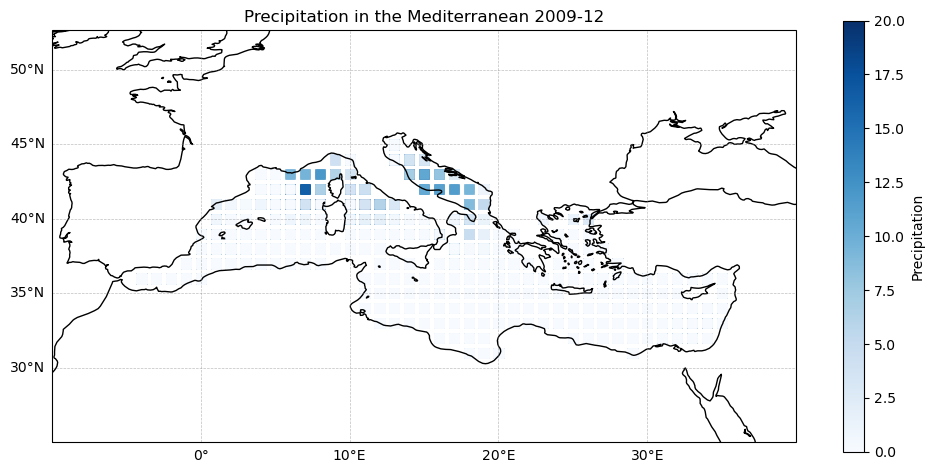

In [98]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Define the map extent for the Mediterranean region
extent = [-10, 40, 25, 50]  # [lon_min, lon_max, lat_min, lat_max]

# Create a map figure
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastline
ax.add_feature(cfeature.COASTLINE)

# Add parallels and meridians
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.left_labels = True  # Do not show labels on the left side
gl.right_labels = False  # Do not show labels on the right side
gl.bottom_labels = True  # Show labels on the bottom side
gl.top_labels = False  # Do not show labels on the top side

# Set the map extent
ax.set_extent(extent)

# Scatter plot the data points with linewidth=0
sc = ax.scatter(df['Longitude'], df['Latitude'], c=df['Precipitation'], cmap='Blues', linewidth=2, transform=ccrs.PlateCarree(), marker='s', vmax=20)  # Set vmax to the desired maximum value

# Add a colorbar
cbar = plt.colorbar(sc, orientation='vertical', shrink=0.7)
cbar.set_label('Precipitation')

# Set the title
plt.title('Precipitation in the Mediterranean 2009-12')

# Display the map
plt.show()


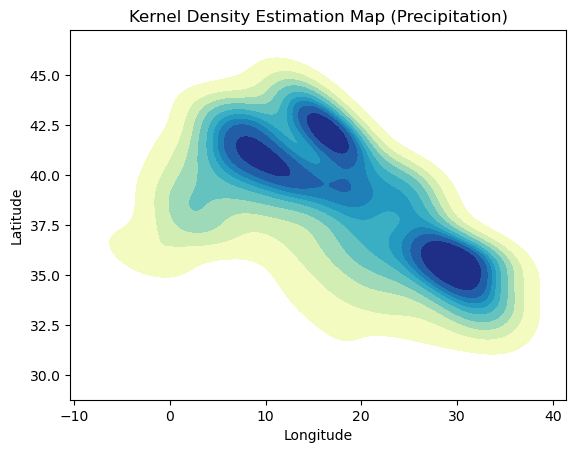

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with columns: Longitude, Latitude, and Precipitation

# Create a KDE plot using seaborn
sns.kdeplot(data=df, x="Longitude", y="Latitude", weights="Precipitation", fill=True, cmap="YlGnBu")

# Set the plot title and labels
plt.title("Kernel Density Estimation Map (Precipitation)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the plot
plt.show()


c:\Users\chefi\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
c:\Users\chefi\anaconda3\lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


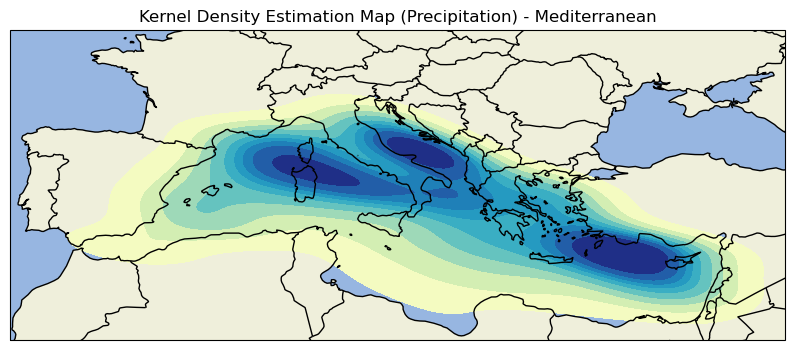

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming your DataFrame is named 'df' with columns: Longitude, Latitude, and Precipitation

# Create a figure and axis using Cartopy
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add a map of the Mediterranean as a background
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Create a KDE plot using seaborn on top of the map
sns.kdeplot(data=df, x="Longitude", y="Latitude", weights="Precipitation", fill=True, cmap="YlGnBu", ax=ax, transform=ccrs.PlateCarree())

# Set the plot title and labels
plt.title("Kernel Density Estimation Map (Precipitation) - Mediterranean")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Set the extent of the plot to the Mediterranean region
ax.set_extent([-10, 40, 30, 50], crs=ccrs.PlateCarree())

# Display the plot
plt.show()


In [12]:
filtered_df = filtered_df.groupby(['Latitude', 'Longitude'])['Precipitation'].sum().reset_index()
filtered_df

,Latitude,Longitude,Precipitation
0,31.0,18.0,1129.113288
1,31.0,19.0,1299.729949
2,31.0,20.0,1345.625456
3,31.0,29.0,1293.464688
4,32.0,16.0,1165.849535
...,...,...,...
245,44.0,10.0,2096.627606
246,44.0,13.0,5527.634975
247,44.0,14.0,4659.994945
248,44.0,15.0,2871.457167


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.stats import gaussian_kde

unique_months = filtered_df['Month'].unique()

for month in unique_months:

    df = filtered_df[filtered_df['Month'] == month]

    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Create a Basemap object with the desired projection and region
    m = Basemap(
        projection='merc',
        llcrnrlon=-6,
        llcrnrlat=29,
        urcrnrlon=37,
        urcrnrlat=47,
        resolution='i'
    )

    # Draw coastlines, countries, and fill the land areas
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.fillcontinents(color='lightgray', lake_color='white')

    # Draw parallels and meridians
    m.drawparallels(range(30, 50, 5), labels=[1, 0, 0, 0], linewidth=0.2, fontsize=8)
    m.drawmeridians(range(-5, 40, 5), labels=[0, 0, 0, 1], linewidth=0.2, fontsize=8)

    # Set the title of the map
    plt.title(month+' Precipitation Map of the Mediterranean')

    # Define the grid for the KDE evaluation
    lon_grid, lat_grid = np.meshgrid(np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100),
                                    np.linspace(df['Latitude'].min(), df['Latitude'].max(), 100))

    # Evaluate the KDE on the grid using the precipitation as weights
    kde = gaussian_kde([df['Longitude'], df['Latitude']], weights=df['Precipitation'])
    kde_values = kde.evaluate([lon_grid.flatten(), lat_grid.flatten()]).reshape(lon_grid.shape)

    # Convert grid coordinates to map projection coordinates
    x_grid, y_grid = m(lon_grid, lat_grid)

    # Plot the KDE as a color-filled contour plot
    plt.pcolormesh(x_grid, y_grid, kde_values, cmap='YlOrRd', shading='auto', vmin=0, vmax=0.009)
    cbar = plt.colorbar(shrink=0.5)
    cbar.set_label('KDE Values')

    plt.savefig('../precip/'+month+' precipitation map.png', dpi=300)


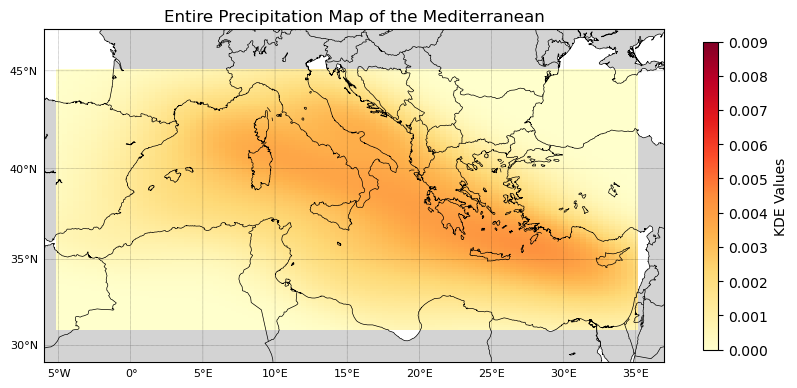

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.stats import gaussian_kde

df = filtered_df.copy()

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap object with the desired projection and region
m = Basemap(
    projection='merc',
    llcrnrlon=-6,
    llcrnrlat=29,
    urcrnrlon=37,
    urcrnrlat=47,
    resolution='i'
)

# Draw coastlines, countries, and fill the land areas
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')

# Draw parallels and meridians
m.drawparallels(range(30, 50, 5), labels=[1, 0, 0, 0], linewidth=0.2, fontsize=8)
m.drawmeridians(range(-5, 40, 5), labels=[0, 0, 0, 1], linewidth=0.2, fontsize=8)

# Set the title of the map
plt.title('Entire Precipitation Map of the Mediterranean')

# Define the grid for the KDE evaluation
lon_grid, lat_grid = np.meshgrid(np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100),
                                np.linspace(df['Latitude'].min(), df['Latitude'].max(), 100))

# Evaluate the KDE on the grid using the precipitation as weights
kde = gaussian_kde([df['Longitude'], df['Latitude']], weights=df['Precipitation'])
kde_values = kde.evaluate([lon_grid.flatten(), lat_grid.flatten()]).reshape(lon_grid.shape)

# Convert grid coordinates to map projection coordinates
x_grid, y_grid = m(lon_grid, lat_grid)

# Plot the KDE as a color-filled contour plot
plt.pcolormesh(x_grid, y_grid, kde_values, cmap='YlOrRd', shading='auto', vmin=0, vmax=0.009)
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('KDE Values')

plt.savefig('../precip/Entire precipitation map.png', dpi=300)


In [9]:
from PIL import Image
import os

# Path to the directory containing the images
image_folder = '../cape maps/'

# Path to the PNG mask image
mask_path = '../mask precip/cape map mask.png'

# Output directory to save the masked images
output_folder = '../masked cape maps'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Load the mask image
mask = Image.open(mask_path)

# Iterate through all PNG images in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        # Load the image
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)

        # Resize the mask to match the image size
        resized_mask = mask.resize(image.size)

        # Apply the mask
        masked_image = Image.alpha_composite(image.convert('RGBA'), resized_mask)

        # Save the masked image to the output folder
        output_path = os.path.join(output_folder, filename)
        masked_image.save(output_path)

        print(f"Masked image saved: {output_path}")


Masked image saved: ../masked cape maps\2009-12 CAPE map.png
Masked image saved: ../masked cape maps\2010-01 CAPE map.png
Masked image saved: ../masked cape maps\2010-02 CAPE map.png
Masked image saved: ../masked cape maps\2010-12 CAPE map.png
Masked image saved: ../masked cape maps\2011-01 CAPE map.png
Masked image saved: ../masked cape maps\2011-02 CAPE map.png
Masked image saved: ../masked cape maps\2011-12 CAPE map.png
Masked image saved: ../masked cape maps\2012-01 CAPE map.png
Masked image saved: ../masked cape maps\2012-02 CAPE map.png
Masked image saved: ../masked cape maps\2012-12 CAPE map.png
Masked image saved: ../masked cape maps\2013-01 CAPE map.png
Masked image saved: ../masked cape maps\2013-02 CAPE map.png
Masked image saved: ../masked cape maps\2013-12 CAPE map.png
Masked image saved: ../masked cape maps\2014-01 CAPE map.png
Masked image saved: ../masked cape maps\2014-02 CAPE map.png
Masked image saved: ../masked cape maps\2014-12 CAPE map.png
Masked image saved: ../m

In [1]:
import pandas as pd
from global_land_mask import globe

df = pd.read_csv("../../new wwlln/upload/2010.csv")

In [4]:
df2 = pd.read_csv("../postprocessed/mediterranean lightnings 2009-2021.csv")
df2

,Date,Latitude,Longitude,Power (J)
0,2009/12/1,37.6420,4.9377,60484.92
1,2009/12/1,38.6991,8.3091,3046.67
2,2009/12/1,36.9608,4.2523,7787.19
3,2009/12/1,39.0087,5.9722,851.00
4,2009/12/1,37.3525,7.2369,5440.39
...,...,...,...,...
1360547,2022/1/25,32.2615,24.6026,12871.69
1360548,2022/1/25,35.7085,32.4864,23209.92
1360549,2022/1/25,34.8443,30.6639,1411.87
1360550,2022/1/25,32.4175,30.6500,1437.48


In [5]:
print(df2["Latitude"].max())
print(df2["Latitude"].min())
print(df2["Longitude"].max())
print(df2["Longitude"].min())

45.7623
29.0022
35.9998
-4.9998


In [2]:
df

,Unnamed: 0,Date,Time,Latitude,Longitude,error,nsta
0,0,2010/01/01,00:00:00.979131,27.4485,51.9362,14.8,6
1,1,2010/01/01,00:00:01.021977,27.5149,51.9375,16.0,6
2,2,2010/01/01,00:00:01.074032,27.4797,51.9446,14.5,10
3,3,2010/01/01,00:00:01.663689,25.8441,-152.8141,14.6,6
4,4,2010/01/01,00:00:01.639541,25.8744,-152.6122,1.5,5
...,...,...,...,...,...,...,...
139525546,139525546,2010/12/31,23:59:58.444806,-25.8879,26.2972,23.5,5
139525547,139525547,2010/12/31,23:59:58.970222,32.0613,-92.2785,3.6,5
139525548,139525548,2010/12/31,23:59:59.287772,33.6661,-88.2052,16.2,6
139525549,139525549,2010/12/31,23:59:59.634044,32.5329,-89.7919,16.9,6


In [6]:
df = df[(df['Latitude'] < 46) & (df['Latitude'] > 29)] 
df = df[(df['Longitude'] > -5) & (df['Longitude'] < 36)]
df = df.drop(df[((df['Latitude'] > 40.625) & (df['Longitude'] > 26.625))].index)
df = df.drop(df[((df['Latitude'] > 43) & (df['Longitude'] < 2))].index)
df = df.drop(df[globe.is_land(df.Latitude, df.Longitude)].index)
df

,Unnamed: 0,Date,Time,Latitude,Longitude,error,nsta
2488,2488,2010/01/01,00:09:16.357561,39.2618,7.5946,0.6,5
3184,3184,2010/01/01,00:12:01.189252,39.0189,3.9280,22.3,7
3229,3229,2010/01/01,00:12:11.640936,43.4288,10.2271,20.2,11
3383,3383,2010/01/01,00:12:41.848789,38.5138,15.2352,13.6,5
3801,3801,2010/01/01,00:14:20.533906,38.9670,3.9474,21.9,10
...,...,...,...,...,...,...,...
139515552,139515552,2010/12/31,23:21:23.847229,32.9035,33.9918,9.4,5
139519444,139519444,2010/12/31,23:36:10.916605,36.1715,35.4573,12.0,6
139519447,139519447,2010/12/31,23:36:11.083966,36.1142,35.4160,12.0,5
139521192,139521192,2010/12/31,23:42:59.362544,36.1504,35.4021,15.0,6


In [7]:
df = df[(df['nsta'] >= 7)]
df 

,Unnamed: 0,Date,Time,Latitude,Longitude,error,nsta
3184,3184,2010/01/01,00:12:01.189252,39.0189,3.9280,22.3,7
3229,3229,2010/01/01,00:12:11.640936,43.4288,10.2271,20.2,11
3801,3801,2010/01/01,00:14:20.533906,38.9670,3.9474,21.9,10
4068,4068,2010/01/01,00:15:35.929713,41.8734,9.4013,20.3,8
5799,5799,2010/01/01,00:22:43.283918,38.3999,2.8972,21.1,7
...,...,...,...,...,...,...,...
139429977,139429977,2010/12/31,18:22:36.246620,35.7549,31.8653,20.5,9
139433229,139433229,2010/12/31,18:33:05.749863,35.4892,32.4112,12.2,8
139435100,139435100,2010/12/31,18:39:49.769954,35.6968,31.7253,12.9,8
139443014,139443014,2010/12/31,19:05:22.850399,35.5938,31.8169,14.2,8


In [9]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m/%d')

df_2010 = df2[df2['Date'].dt.year == 2010]
df_2010

,Date,Latitude,Longitude,Power (J)
27389,2010-01-01,41.8676,9.4085,20083.19
27390,2010-01-01,39.0313,4.1511,7371.30
27391,2010-01-01,38.8053,4.0867,843.65
27392,2010-01-01,39.0261,4.1472,4205.82
27393,2010-01-01,39.1194,4.2846,758.99
...,...,...,...,...
65068,2010-12-31,36.4387,31.7409,10232.45
65069,2010-12-31,35.8753,31.8909,1442.23
65070,2010-12-31,35.8727,31.8123,3927.32
65071,2010-12-31,36.0729,34.9484,2193.05


In [1]:
import pandas as pd
from global_land_mask import globe

df = pd.read_csv("../RELEVANT CSVS/cape.csv")
df = df[(df['Latitude'] <= 46) & (df['Latitude'] >= 29)] 
df = df[(df['Longitude'] >= -5) & (df['Longitude'] <= 36)]
df = df.drop(df[((df['Latitude'] > 40.625) & (df['Longitude'] > 26.625))].index)
df = df.drop(df[((df['Latitude'] > 43) & (df['Longitude'] < 2))].index)
df = df.drop(df[globe.is_land(df.Latitude, df.Longitude)].index)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df


,Latitude,Longitude,CAPE,Date,Month
79,45.00,13.00,0.000000,2009-12-01,2009-12
81,45.00,14.50,35.218750,2009-12-01,2009-12
128,44.25,8.50,18.816406,2009-12-01,2009-12
129,44.25,9.25,67.980469,2009-12-01,2009-12
134,44.25,13.00,0.000000,2009-12-01,2009-12
...,...,...,...,...,...
39194206,31.50,33.25,0.000000,2020-12-31,2020-12
39194207,31.50,34.00,0.000000,2020-12-31,2020-12
39194241,30.75,18.25,0.000000,2020-12-31,2020-12
39194242,30.75,19.00,0.000000,2020-12-31,2020-12


In [2]:
grouped_df = df.groupby(['Latitude', 'Longitude', 'Month'])['CAPE'].mean().reset_index()
grouped_df['Month'] = grouped_df['Month'].astype(str)
filtered_df = grouped_df[grouped_df['Month'].str.endswith('-01') | grouped_df['Month'].str.endswith('-02') | grouped_df['Month'].str.endswith('-12')]
filtered_df

,Latitude,Longitude,Month,CAPE
0,30.75,18.25,2009-12,2.743920
1,30.75,18.25,2010-01,3.518677
2,30.75,18.25,2010-02,1.190953
12,30.75,18.25,2010-12,3.969837
13,30.75,18.25,2011-01,10.709488
...,...,...,...,...
61556,45.00,14.50,2019-02,6.639653
61566,45.00,14.50,2019-12,19.216907
61567,45.00,14.50,2020-01,9.508128
61568,45.00,14.50,2020-02,17.671782


In [6]:
filtered_df = filtered_df.groupby(['Latitude', 'Longitude'])['CAPE'].mean().reset_index()
filtered_df

,Latitude,Longitude,CAPE
0,30.75,18.25,6.989500
1,30.75,19.00,9.513241
2,30.75,19.75,9.152387
3,31.50,16.00,8.525721
4,31.50,16.75,9.594956
...,...,...,...
458,44.25,13.00,7.075736
459,44.25,13.75,8.733246
460,44.25,14.50,9.086644
461,45.00,13.00,6.755031


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.stats import gaussian_kde

unique_months = filtered_df['Month'].unique()

for month in unique_months:

    df = filtered_df[filtered_df['Month'] == month]

    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Create a Basemap object with the desired projection and region
    m = Basemap(
        projection='merc',
        llcrnrlon=-6,
        llcrnrlat=29,
        urcrnrlon=37,
        urcrnrlat=47,
        resolution='i'
    )

    # Draw coastlines, countries, and fill the land areas
    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    m.fillcontinents(color='lightgray', lake_color='white')

    # Draw parallels and meridians
    m.drawparallels(range(30, 50, 5), labels=[1, 0, 0, 0], linewidth=0.2, fontsize=8)
    m.drawmeridians(range(-5, 40, 5), labels=[0, 0, 0, 1], linewidth=0.2, fontsize=8)

    # Set the title of the map
    plt.title(str(month)+' CAPE Map of the Mediterranean')

    # Define the grid for the KDE evaluation
    lon_grid, lat_grid = np.meshgrid(np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100),
                                    np.linspace(df['Latitude'].min(), df['Latitude'].max(), 100))

    # Evaluate the KDE on the grid using the precipitation as weights
    kde = gaussian_kde([df['Longitude'], df['Latitude']], weights=df['CAPE'])
    kde_values = kde.evaluate([lon_grid.flatten(), lat_grid.flatten()]).reshape(lon_grid.shape)

    # Convert grid coordinates to map projection coordinates
    x_grid, y_grid = m(lon_grid, lat_grid)

    # Plot the KDE as a color-filled contour plot
    plt.pcolormesh(x_grid, y_grid, kde_values, cmap='YlOrRd', shading='auto', vmin=0,vmax=0.011)
    cbar = plt.colorbar(shrink=0.5)
    cbar.set_label('KDE Values')

    plt.savefig('../CAPE MAPS/'+str(month)+' CAPE map.png', dpi=300)


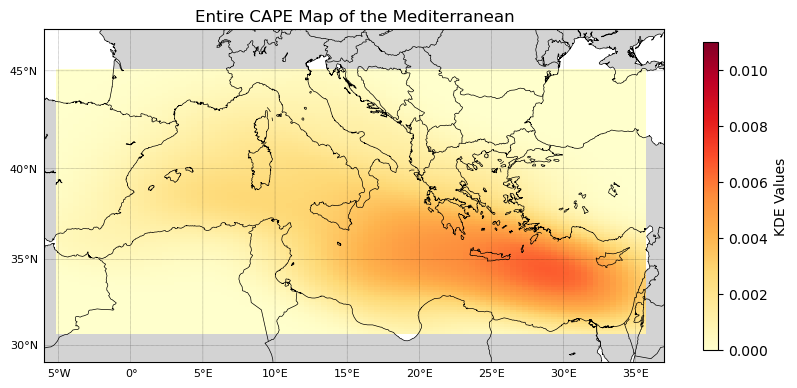

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
from scipy.stats import gaussian_kde

df = filtered_df.copy()

# Create a new figure
plt.figure(figsize=(10, 8))

# Create a Basemap object with the desired projection and region
m = Basemap(
    projection='merc',
    llcrnrlon=-6,
    llcrnrlat=29,
    urcrnrlon=37,
    urcrnrlat=47,
    resolution='i'
)

# Draw coastlines, countries, and fill the land areas
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=0.5)
m.fillcontinents(color='lightgray', lake_color='white')

# Draw parallels and meridians
m.drawparallels(range(30, 50, 5), labels=[1, 0, 0, 0], linewidth=0.2, fontsize=8)
m.drawmeridians(range(-5, 40, 5), labels=[0, 0, 0, 1], linewidth=0.2, fontsize=8)

# Set the title of the map
plt.title('Entire CAPE Map of the Mediterranean')

# Define the grid for the KDE evaluation
lon_grid, lat_grid = np.meshgrid(np.linspace(df['Longitude'].min(), df['Longitude'].max(), 100),
                                np.linspace(df['Latitude'].min(), df['Latitude'].max(), 100))

# Evaluate the KDE on the grid using the precipitation as weights
kde = gaussian_kde([df['Longitude'], df['Latitude']], weights=df['CAPE'])
kde_values = kde.evaluate([lon_grid.flatten(), lat_grid.flatten()]).reshape(lon_grid.shape)

# Convert grid coordinates to map projection coordinates
x_grid, y_grid = m(lon_grid, lat_grid)

# Plot the KDE as a color-filled contour plot
plt.pcolormesh(x_grid, y_grid, kde_values, cmap='YlOrRd', shading='auto', vmin=0, vmax=0.011)
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('KDE Values')

plt.savefig('../cape maps/Entire CAPE map.png', dpi=300)
